<a href="https://colab.research.google.com/github/mebirtukan/Notebook-for-2DCNN_LSTM-for-Eye-Movement-Event-Detections/blob/main/Eye_Movement_Event_Detection_with_2D_CNN_LSTM_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import libraries

#%%writefile imoprt_libraries.py
import tensorflow.keras.initializers as KI
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPool1D, Conv2D
from tensorflow.keras.layers import BatchNormalization, TimeDistributed, LSTM
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import f1_score
import os
import glob

In [ ]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip events.zip > xx

--2023-11-20 09:25:32--  http://www.kasprowski.pl/datasets/events.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2909538 (2.8M) [application/zip]
Saving to: ‘events.zip’

events.zip          100%[===================>]   2.77M  2.53MB/s    in 1.1s    

2023-11-20 09:25:33 (2.53 MB/s) - ‘events.zip’ saved [2909538/2909538]



In [ ]:
#@title Openfile function


def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  ndata
  data_headline = ndata['pos']
  print(data_headline)
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  len(data_raw)
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  print(pdata)
  df=pd.DataFrame(pdata)
  df=pd.DataFrame(pdata)
  df.dtypes
  df[1.0]=df[1.0].astype(int)
  df[1.0].dtypes
  t=pdata.iloc[:, 0].values
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  x[0]
  x.shape[0]
  return t, x ,y

In [ ]:
#@title #Dataset Used for Evaluation
"The files we used are listed here"

files_to_load = ['data/UH47_video_BergoDalbana_labelled_RA.mat','data/UH29_video_dolphin_fov_labelled_RA.mat','data/UH47_video_BergoDalbana_labelled_MN.mat','data/UH29_video_dolphin_fov_labelled_MN.mat','data/TL30_video_triple_jump_labelled_RA.mat','data/TL30_video_triple_jump_labelled_MN.mat']#],'data/TH38_video_dolphin_fov_labelled_RA']
tt=[]
xx=[]
yy=[]
for file in files_to_load:
  T,X,Y=openfile(file)
  tt.append(T)
  xx.append(X)
  yy.append(Y)

[[2.30254838e+09 1.90000000e+01 1.80000000e+01 5.12111700e+02
  3.83055200e+02 1.00000000e+00]
 [2.30255338e+09 1.90000000e+01 1.90000000e+01 5.12586200e+02
  3.82839100e+02 1.00000000e+00]
 [2.30255838e+09 1.90000000e+01 1.90000000e+01 5.12721500e+02
  3.83162000e+02 1.00000000e+00]
 ...
 [2.31058334e+09 2.20000000e+01 2.20000000e+01 5.16795900e+02
  3.20544300e+02 1.00000000e+00]
 [2.31058834e+09 2.40000000e+01 2.20000000e+01 5.18114200e+02
  3.20650000e+02 1.00000000e+00]
 [2.31059334e+09 2.30000000e+01 2.30000000e+01 5.19719300e+02
  3.19982600e+02 1.00000000e+00]]
      2.302548e+09  1.900000e+01  1.800000e+01  5.121117e+02  3.830552e+02  \
0     2.302548e+09          19.0          18.0      512.1117      383.0552   
1     2.302553e+09          19.0          19.0      512.5862      382.8391   
2     2.302558e+09          19.0          19.0      512.7215      383.1620   
3     2.302563e+09          19.0          19.0      512.6691      384.2532   
4     2.302568e+09          18.0  

 max_velocity= 0.21638202549002175
min_vel= -0.22117255238555383
min acc= -8.037567597864014e-05
max acc= 8.292982926206646e-05
min jerk= -3.200766857695047e-08
max jerk= 2.8767329192033266e-08
max distance= 1119.0946677607176
min distanve= -40.15132931729299


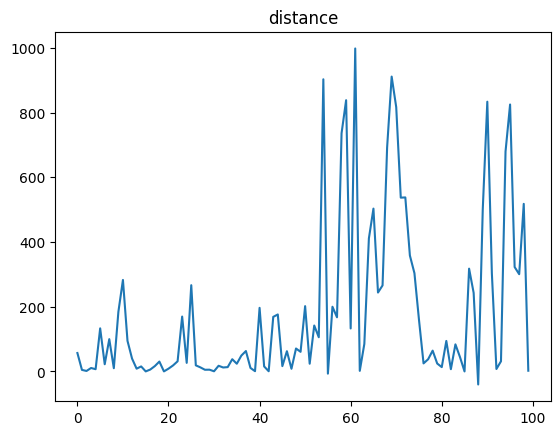

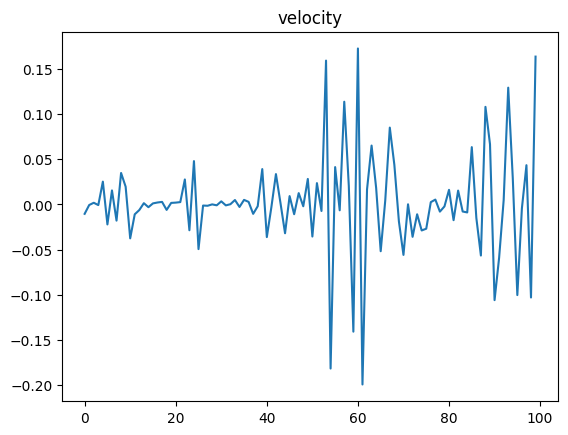

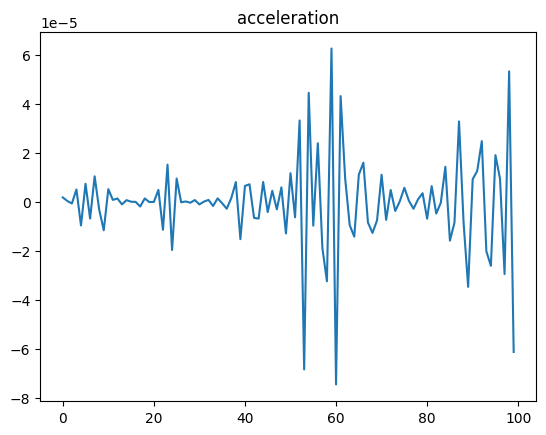

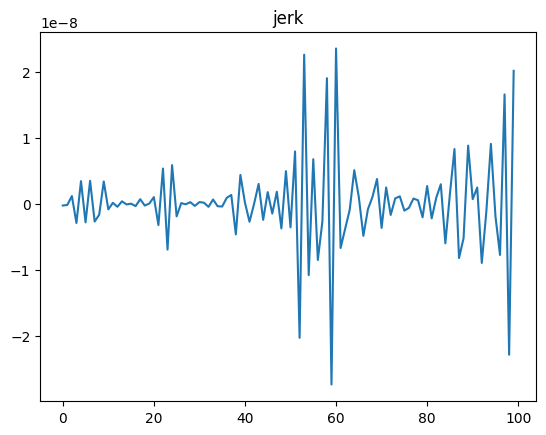

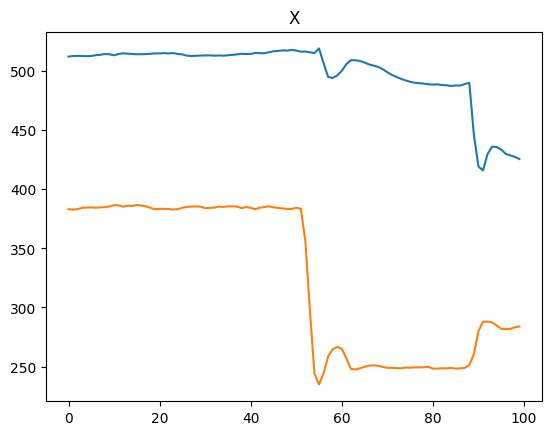

 max_velocity= 0.7203166397823664
min_vel= -0.7472682984248116
min acc= -0.0007276501842089913
max acc= 0.0006651130277750752
min jerk= -5.537600172245529e-07
max jerk= 6.960335891974346e-07
max distance= 1544.3401239136595
min distanve= -22.1856007355207


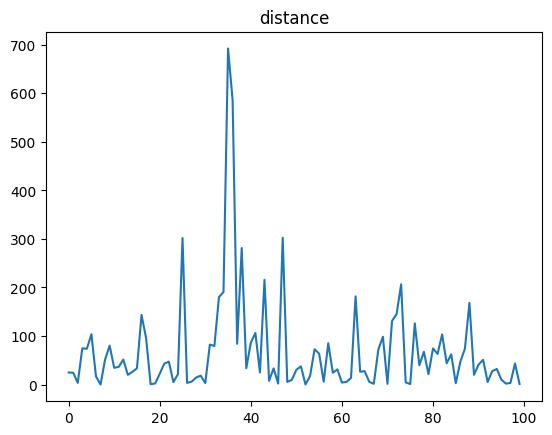

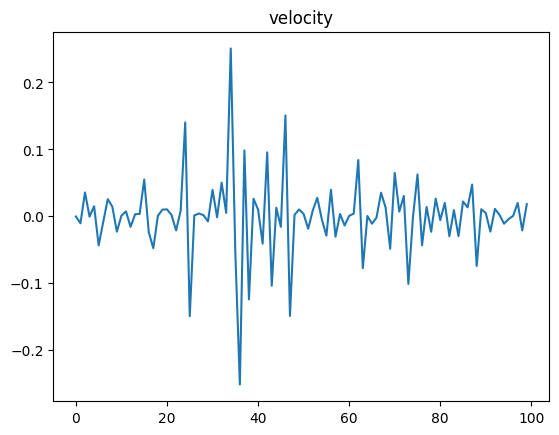

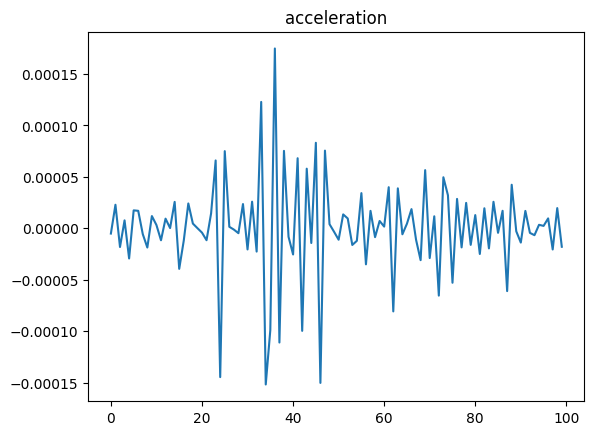

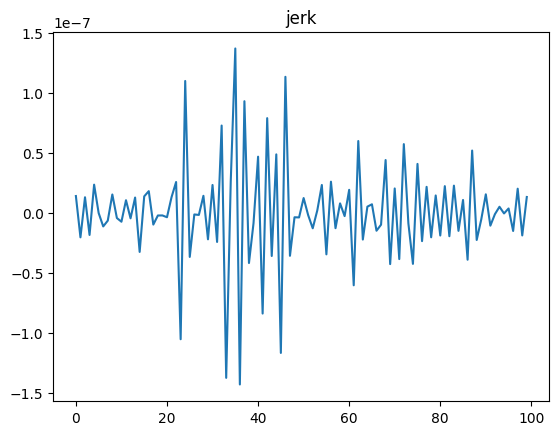

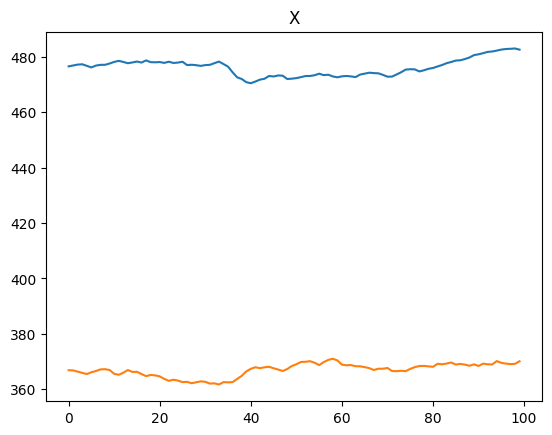

 max_velocity= 0.21638202549002175
min_vel= -0.22117255238555383
min acc= -8.037567597864014e-05
max acc= 8.292982926206646e-05
min jerk= -3.200766857695047e-08
max jerk= 2.8767329192033266e-08
max distance= 1119.0946677607176
min distanve= -40.15132931729299


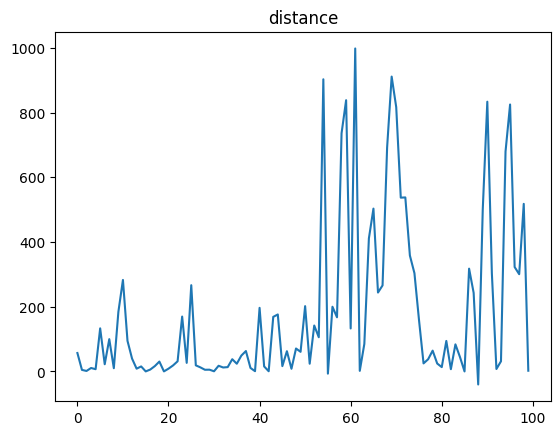

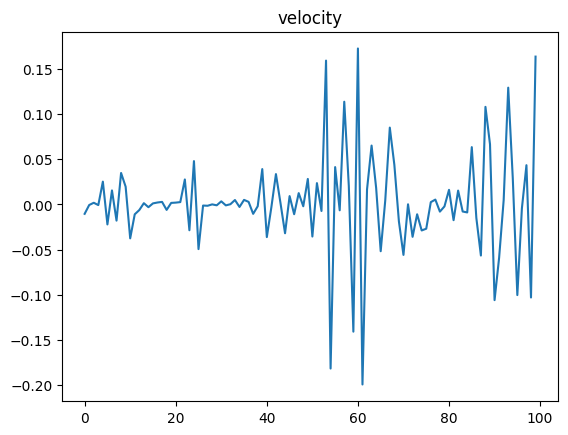

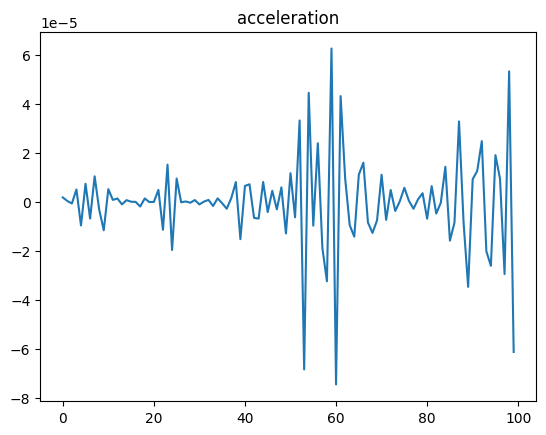

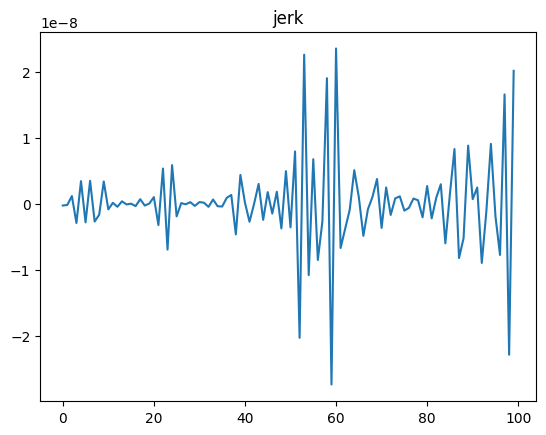

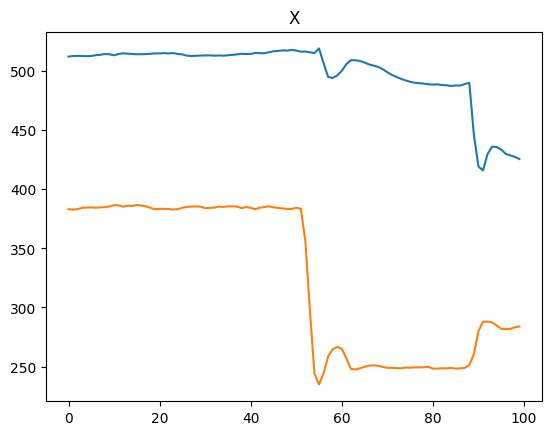

 max_velocity= 0.7203166397823664
min_vel= -0.7472682984248116
min acc= -0.0007276501842089913
max acc= 0.0006651130277750752
min jerk= -5.537600172245529e-07
max jerk= 6.960335891974346e-07
max distance= 1544.3401239136595
min distanve= -22.1856007355207


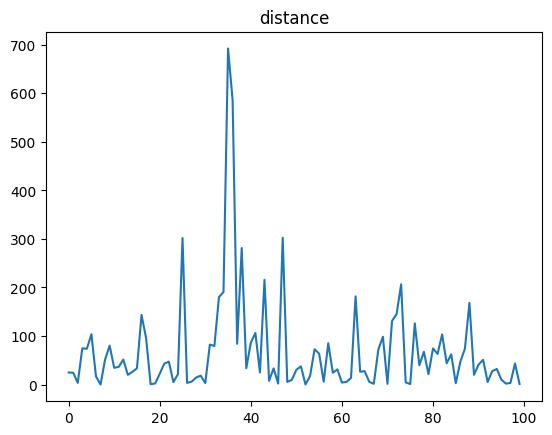

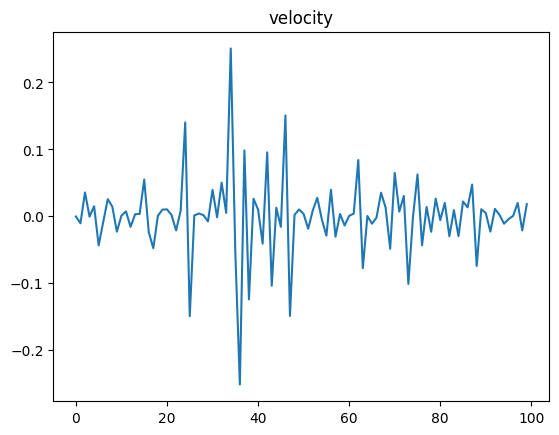

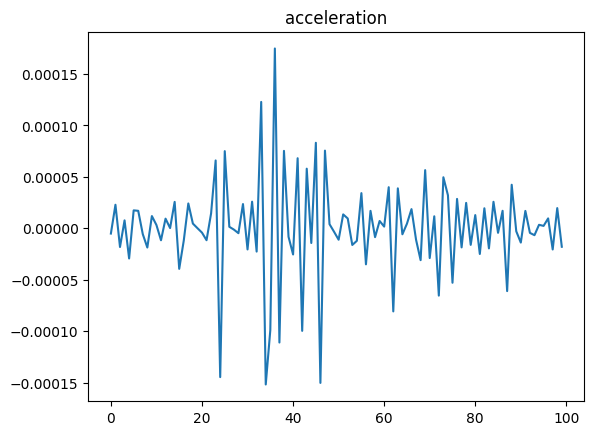

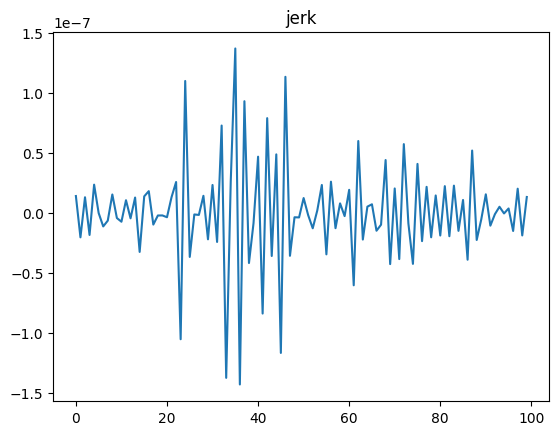

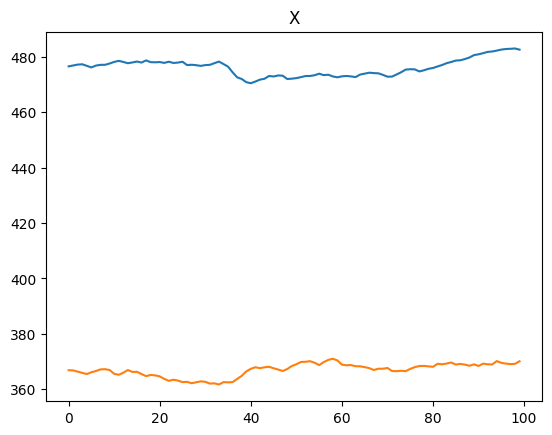

 max_velocity= 0.8558873367328832
min_vel= -0.8525927302113606
min acc= -0.0008201718545116372
max acc= 0.0007522467065249432
min jerk= -7.381719671550377e-07
max jerk= 7.469832523595242e-07
max distance= 1732.6969658197413
min distanve= -29.9352482354228


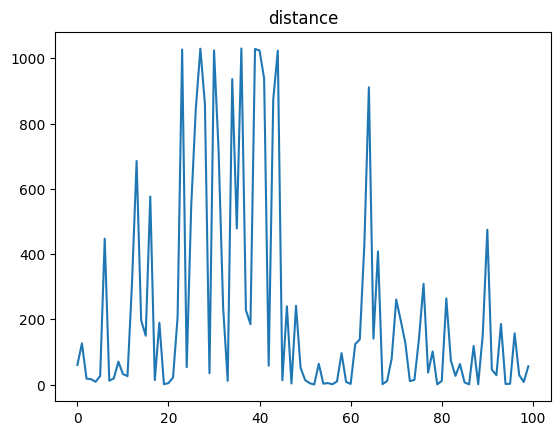

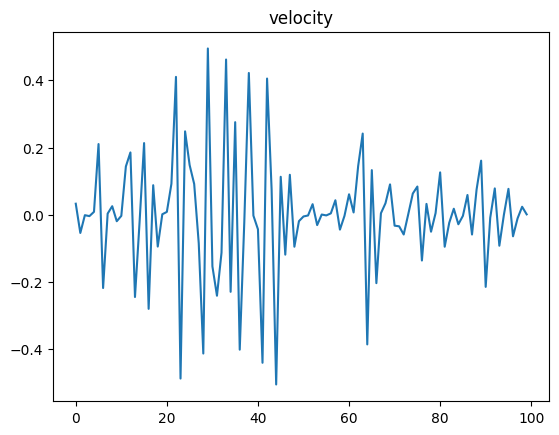

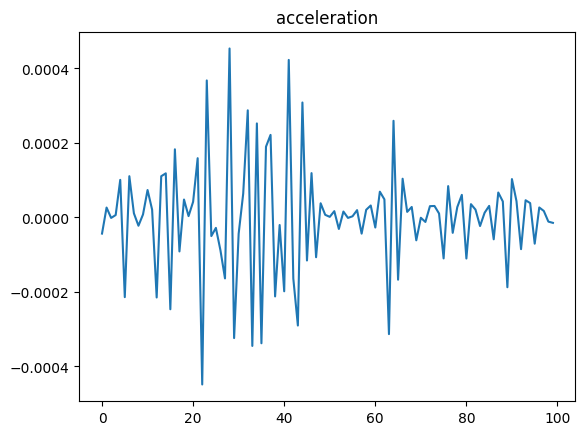

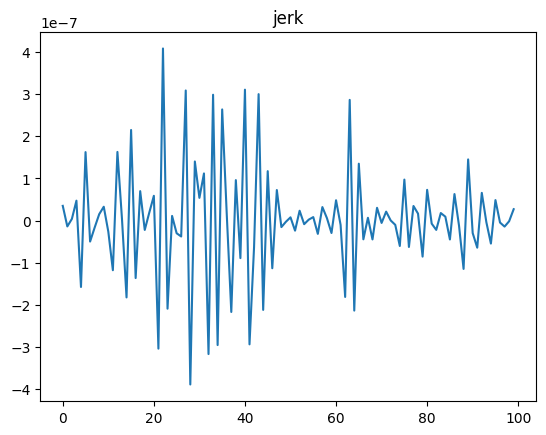

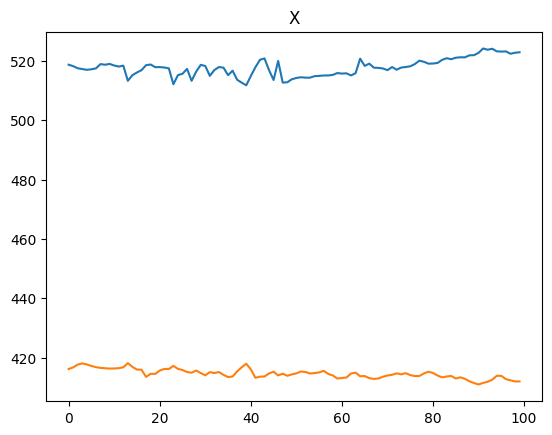

 max_velocity= 0.8558873367328832
min_vel= -0.8525927302113606
min acc= -0.0008201718545116372
max acc= 0.0007522467065249432
min jerk= -7.381719671550377e-07
max jerk= 7.469832523595242e-07
max distance= 1732.6969658197413
min distanve= -29.9352482354228


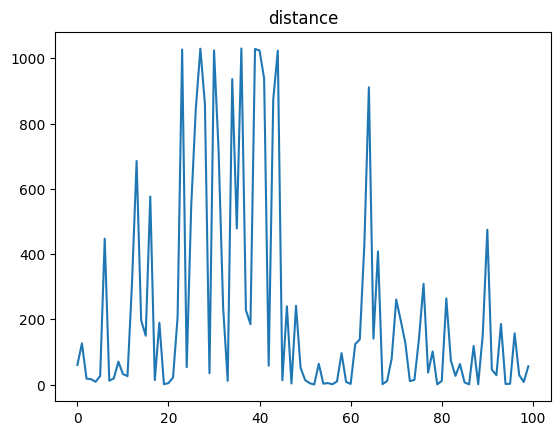

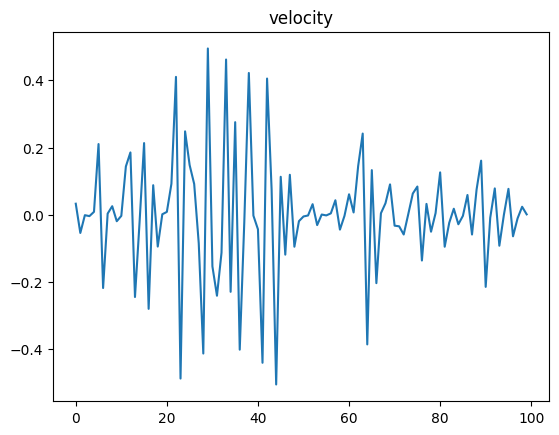

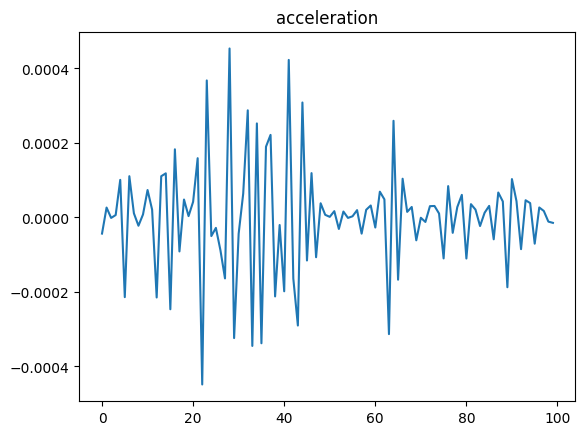

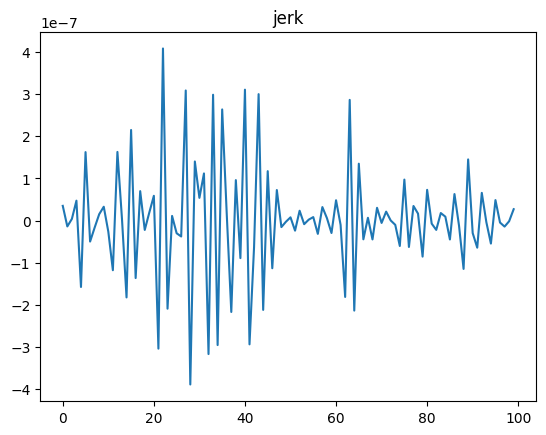

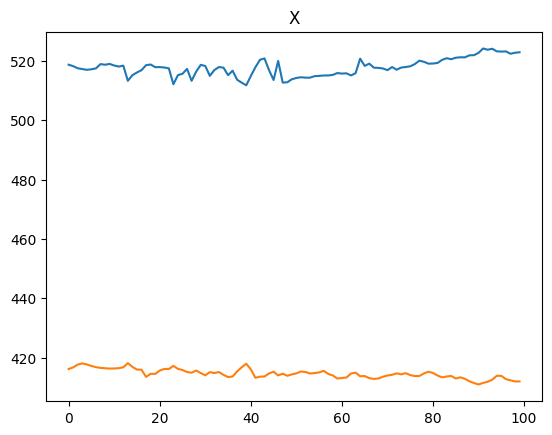

In [ ]:
#@title #Calculate  and combine features

from numpy.core.fromnumeric import mean
import csv
import numpy as np
import math
def calculate_features(data, Time):
  times = Time#data[:,[0]]
  ts = []

  # convert time to second
  for T in times:
    ts.append(float(T)/1000.0)

  Xs = data[:,[0]]
  Ys = data[:,[1]]
  global Direction
  Direction=[]
  global distance
  distance=[]

  diffX = [] #x values difference
  diffY = [] #y values difference
  diffT = [] #time values difference

  for i in range(len(data) - 1):
   diffX.append((float(Xs[i+1])) - float(Xs[i])*math.cos(float(Xs[i+1])-float(Xs[i] )))
   diffY.append((float(Ys[i+1]) - float(Ys[i]))*math.sin(float(Ys[i+1])-float(Ys[i] )))

  for i in range(len(diffX)):
    distance.append((diffX[i]+diffY[i]))

    diffT.append(float(ts[i+1])*1000 - float(ts[i])*1000 )
  for j in range(len(diffX)):
    Direction.append(math.atan2(diffX[j], diffY[j]))

  global velocity
  global acceleration
  global jerk
  Jounce=[]
  Velocity=[]
  Jerk=[]
  Acceleration=[]


  for i in range(len(distance)-1):

    Velocity.append(np.divide(((distance[i+1])-(distance[i])),(diffT[i])))

  for i in range(len(Velocity)-1):
    Acceleration.append(np.divide(((Velocity[i+1])-(Velocity[i])),((diffT[i]))))

  for i in range(len(Acceleration)-1):
    Jerk.append(np.divide(((Acceleration[i+1])-(Acceleration[i])),((diffT[i]))))


  Velocity = Velocity[:len(Jerk)]
  Acceleration = Acceleration[:len(Jerk)]
  Direction = Direction[:len(Jerk)]



  print(' max_velocity=',max(Velocity))
  print('min_vel=', min(Velocity))
  print('min acc=', min(Acceleration))
  print('max acc=', max(Acceleration))
  print('min jerk=', min(Jerk))
  print('max jerk=', max(Jerk))
  print('max distance=', max(distance))
  print('min distanve=', min(distance))


## visualisation
  size = 100
  plt.plot(distance[:size])
  plt.title("distance")
  plt.show()
  plt.plot(Velocity[:size])
  plt.title("velocity")
  plt.show()
  plt.plot(Acceleration[:size])
  plt.title("acceleration")
  plt.show()
  plt.plot(Jerk[:size])
  plt.title("jerk")
  plt.show()
  plt.plot(data[:size])
  plt.title("X")
  plt.show()



  return Velocity, Acceleration, Jerk, Direction


#Combine Features
vel=[]
acc=[]
jerk=[]
dir=[]
VD=[]
AD=[]
VAD=[]
AJD=[]
VJD=[]
VAJD=[]
for file, tim in zip(xx,tt):
  V,A,J,D=calculate_features(file, tim)
  VD.append((np.vstack((V, D)).T))
  AD.append((np.vstack((A, D)).T))
  VAD.append((np.vstack((V, A,D)).T))
  VJD.append((np.vstack((V, J, D)).T))
  AJD.append((np.vstack((A, J, D)).T))
  VAJD.append((np.vstack((V, A,J, D)).T))

In [ ]:
#@title #Build the model and calculate the evalaution metrics
"""
Create a 2D-CNN-BLSTM model that contains 3 blocks of layers: Conv2D , Dense and LSTM blocks.

Each layer in the Conv2D block has the filter size of 5, and is followed by BatchNormalization, ReLU activation and Dropout.

After the conv2D block there is apermute function that reshapes the output of the conv2d into LSTM input shape.

The LSTM layers use relu activation. After the LSTM block, the models contains a  Dense layer with softmax activation that
has the number of classes units.
"""
def build_test_model(N_features, X,y, Name):
  global y_pred_total
  global y_test_total
  CM=[] #Confusino matrix
  K=[] #Cohen kappa value for each test set is stored
  y_pred_total=[] # predicted value for each test set is stored in K
  y_test_total=[] #Actual values of each test set is stored
  models = keras.Sequential()
  models.add(keras.Input(shape=(50, N_features, 1)))
  #intializing randomly orthogonal weights.
  # initializer = tf.keras.initializers.Orthogonal()
  #Adding 3 layes of CNN.
  models.add(layers.Conv2D(32, kernel_size=(5, 1), activation="relu",padding='same',kernel_initializer=KI.RandomNormal(), bias_initializer='zeros'))
  models.add(BatchNormalization())
  models.add(Dropout(0.2))
  models.add(layers.Conv2D(16, kernel_size=(5, 1), activation="relu",padding='same',kernel_initializer=KI.RandomNormal(),bias_initializer='zeros'))
  models.add(BatchNormalization())
  models.add(Dropout(0.2))
  models.add(layers.Conv2D(16, kernel_size=(5, 1), activation="relu",padding='same',kernel_initializer=KI.RandomNormal(),bias_initializer='zeros'))

  models.add(layers.Permute((1,3,2)))
  models.add(layers.Reshape( (int(models.layers[4].output_shape[1]), int(models.layers[4].output_shape[2]) * int(models.layers[4].output_shape[3]))))
  #Adding LSTM layers.
  models.add(layers.LSTM(32,dropout=0.2,return_sequences=True,kernel_initializer=KI.RandomNormal(),bias_initializer='zeros'))
  models.add(Activation("relu"))
  models.add(layers.LSTM(16,dropout=0.2,return_sequences=True,kernel_initializer=KI.RandomNormal(),bias_initializer='zeros'))
  models.add(Activation("relu"))
  models.add(layers.Flatten())

  models.add(layers.Dense(4, activation="softmax"))
  models.summary()

  #Cross validation
  for i in range(len(X)):
    X_train = np.concatenate([(X[j]) for j in range(len(X)) if j != i])
    y_train = np.concatenate([(y[j]) for j in range(len(y)) if j != i])
    X_test = (X[i])
    y_test = (y[i])
    lb = LabelBinarizer()
    lb.fit(y_train)
    lb.fit(y_test)
    y_train = lb.transform(y_train)
    y_test = lb.transform(y_test)
    models.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.CategoricalAccuracy()])
    models.fit(X_train, y_train,batch_size=50, epochs=25
           ,validation_data=(X_test,y_test)
           )
    print("Test")
    A_RESULT = models.predict(X_test)
    print(confusion_matrix(y_test.argmax(axis=1), A_RESULT.argmax(axis=1)))
    CM.append((confusion_matrix(y_test.argmax(axis=1), A_RESULT.argmax(axis=1))))

    print("Accuracy: {:.2f}".format(accuracy_score(y_test.argmax(axis=1), A_RESULT.argmax(axis=1))))
    print("Cohen's Kappa {:.2f}".format(cohen_kappa_score(y_test.argmax(axis=1), A_RESULT.argmax(axis=1))))
    y_pred_total.append(A_RESULT.argmax(axis=1))# Reverse binarize
    y_test_total.append(y_test.argmax(axis=1))
    K.append((cohen_kappa_score(y_test.argmax(axis=1), A_RESULT.argmax(axis=1))))
  print('mean K=',(K[0]+K[1]+K[2]+K[3]+K[4]+K[5])/len(X))
  CM_MEAN=(CM[0]+CM[1]+CM[2]+CM[3]+CM[4]+CM[5])/len(X)

  # PLOT MEAN CONFUSION MATRIX
  CM_MEAN=np.round(CM_MEAN/np.sum(CM_MEAN, axis=1).reshape(-1, 1), 2)
  from matplotlib.pyplot import figure
  figure(figsize=(3, 2),dpi=600)
  sns.heatmap(CM_MEAN, cmap='Blues', annot=True, cbar_kws={"orientation": "vertical", "label": "color bar"}, xticklabels=['fix','sac','pso','sp'], yticklabels=['fix', 'sac', 'pso','sp'])
  plt.xlabel("Predicted value")
  plt.ylabel("Actual value")
  plt.title("{}".format(Name))
  plt.show()
  #CALCULATE METRICS (F1_SCORE, RECALL, PRECISSION)
  #FIXATION RECALL
  sumf=CM_MEAN[0][0]+CM_MEAN[0][1]+CM_MEAN[0][2]+CM_MEAN[0][3]
  Tc=CM_MEAN[0][0]
  print('Fixation recall=',(Tc*100/sumf))

  #fixation precision
  sumfp=CM_MEAN[0][0]+CM_MEAN[1][0]+CM_MEAN[2][0]+CM_MEAN[3][0]
  Tcfp=CM_MEAN[0][0]
  print('fixation_precision=',(Tcfp*100/sumfp))
  #fixation f1_score
  multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  result_f1_score=multiple_recal_prec/add_recall_prec
  print('fixation_f1_score=',(result_f1_score))
  #Saccade RECALL calculation
  sums=CM_MEAN[1][0]+CM_MEAN[1][1]+CM_MEAN[1][2]+CM_MEAN[1][3]
  Tcs=CM_MEAN[1][1]
  print('saccade_recall=',(Tcs*100/sums))

  #Saccade precison
  sum_saccP=CM_MEAN[0][1]+CM_MEAN[1][1]+CM_MEAN[2][1]+CM_MEAN[3][1]
  Tc_saccP=CM_MEAN[1][1]
  print('saccade_precision=',(Tc_saccP*100/sum_saccP))
  #saccade f1_score
  multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  print('saccade_f1_score=',(multiply/addition))
  #PSO RECALL
  sum_pso=CM_MEAN[2][0]+CM_MEAN[2][1]+CM_MEAN[2][2]+CM_MEAN[2][3]
  Tc_pso=CM_MEAN[2][2]
  print('PSO recall=',(Tc_pso*100/sum_pso))

  #PSO precision
  sum_psop=CM_MEAN[0][2]+CM_MEAN[1][2]+CM_MEAN[2][2]+CM_MEAN[3][2]
  #Tcfp=CM_MEAN[2][2]
  fixation_precision=(Tc_pso*100/sum_psop)
  print('PSO precission=',(Tc_pso*100/sum_psop))
  #PSO f1_score
  multiple_recal_prec_pso=2*((Tc_pso*100/sum_pso)*(Tc_pso*100/sum_psop))
  add_recall_prec_pso=((Tc_pso*100/sum_pso)+Tc_pso*100/sum_psop)
  result_f1_score_pso=multiple_recal_prec_pso/add_recall_prec_pso
  print('PSO_f1_score=',(result_f1_score_pso))
  #SP RECALL
  sum_sp=CM_MEAN[3][0]+CM_MEAN[3][1]+CM_MEAN[3][2]+CM_MEAN[3][3]
  Tc_sp=CM_MEAN[3][3]
  print('SP recall=',(Tc_sp*100/sum_sp))

  #SP precision
  sum_spp=CM_MEAN[0][3]+CM_MEAN[1][3]+CM_MEAN[2][3]+CM_MEAN[3][3]
  #Tcfp=CM_MEAN[2][2]
  sp_precision=(Tc_sp*100/sum_spp)
  print('SP precission=',(Tc_sp*100/sum_spp))
  #SP f1_score
  multiple_recal_prec_sp=2*((Tc_sp*100/sum_sp)*(Tc_sp*100/sum_spp))
  add_recall_prec_sp=((Tc_sp*100/sum_sp)+Tc_sp*100/sum_spp)
  result_f1_score_sp=multiple_recal_prec_sp/add_recall_prec_sp
  print('SP_f1_score=',(result_f1_score_sp))

In [ ]:
#@title #Merge neighbouring events and calculate duration and number of events
" This function is used to merge negibouring events and calculates numbers and mean durations of events."
from numpy.lib.function_base import median
def merge_Fix(y_pred):
  global fix
  global sac
  global pso
  global sp
  global XX
  global YY

  global mean_fix_dur
  global mean_sac_dur
  global mean_pso_dur
  global mean_sp_dur



  global dur_pso
  global dur_sp
  global dur_sac
  global dur
  fix=[]
  XX=[]
  YY=[]
  X_sac=[]
  Y_sac=[]
  X_pso=[]
  Y_pso=[]
  X_sp=[]
  Y_sp=[]
  dur=[]
  sac=[]
  pso=[]
  sp=[]
  dur_pso=[]
  dur_sp=[]
  dur_sac=[]
  idx = 0
  while idx < (len(y_pred)):
    strt_pos = idx
    val = y_pred[idx]

    while (idx < len(y_pred) and y_pred[idx] == val):

        idx += 1
    end_pos = idx - 1
    if val==0:

      fix.append((1, strt_pos, end_pos))
      dur.append((end_pos+1)-(strt_pos))
      mean_fix_dur=(sum(dur)/len(dur)) #Mean fixation duration for each test file


    else:
      if val==1:

        sac.append((2, strt_pos, end_pos))
        dur_sac.append((end_pos+1)-(strt_pos))
        mean_sac_dur=(sum(dur_sac)/len(dur_sac))


      else:
        if val==2:

          pso.append((3, strt_pos, end_pos))
          dur_pso.append((end_pos+1)-(strt_pos))
          mean_pso_dur=(sum(dur_pso)/len(dur_pso))


        else:
          if val==3:
             sp.append((4, strt_pos, end_pos))
             dur_sp.append((end_pos+1)-(strt_pos))
             mean_sp_dur=(sum(dur_sp)/len(dur_sp))

In [ ]:
# @title # A Funtion to create sequences of samples
"Convert samples into chunks of sequence_dim length with lag = sequence_lag"
attributes=[2,3,4]

def make_sequences1(samples, labels, sequence_dim = 100, sequence_lag = 1,sequence_attributes=A):
    nsamples = []
    nlabels = []
    for i in range(0,samples.shape[0]-sequence_dim,sequence_lag):
            nsample = np.zeros((sequence_dim,A))
            for j in range(i,i+sequence_dim):
              if A==2:
                nsample[j-i,0] = samples[j,0]
                nsample[j-i,1] = samples[j,1]
                continue
              if A==3:
                    nsample[j-i,0] = samples[j,0]
                    nsample[j-i,1] = samples[j,1]
                    nsample[j-i,2] = samples[j,2]
                    continue
              if A==4:
                      nsample[j-i,0] = samples[j,0]
                      nsample[j-i,1] = samples[j,1]
                      nsample[j-i,2] = samples[j,2]
                      nsample[j-i,3] = samples[j,3]
            nlabel = labels[i+sequence_dim//2]
            nsamples.append(nsample)
            nlabels.append(nlabel)

    samples = np.array(nsamples)
    labels = np.array(nlabels)
    return samples,labels

sequence_dim = 50

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 50, 2, 32)         192       
                                                                 
 batch_normalization_10 (Ba  (None, 50, 2, 32)         128       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 50, 2, 32)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 2, 16)         2576      
                                                                 
 batch_normalization_11 (Ba  (None, 50, 2, 16)         64        
 tchNormalization)                                               
                                                                 
 dropout_11 (Dropout)        (None, 50, 2, 16)        

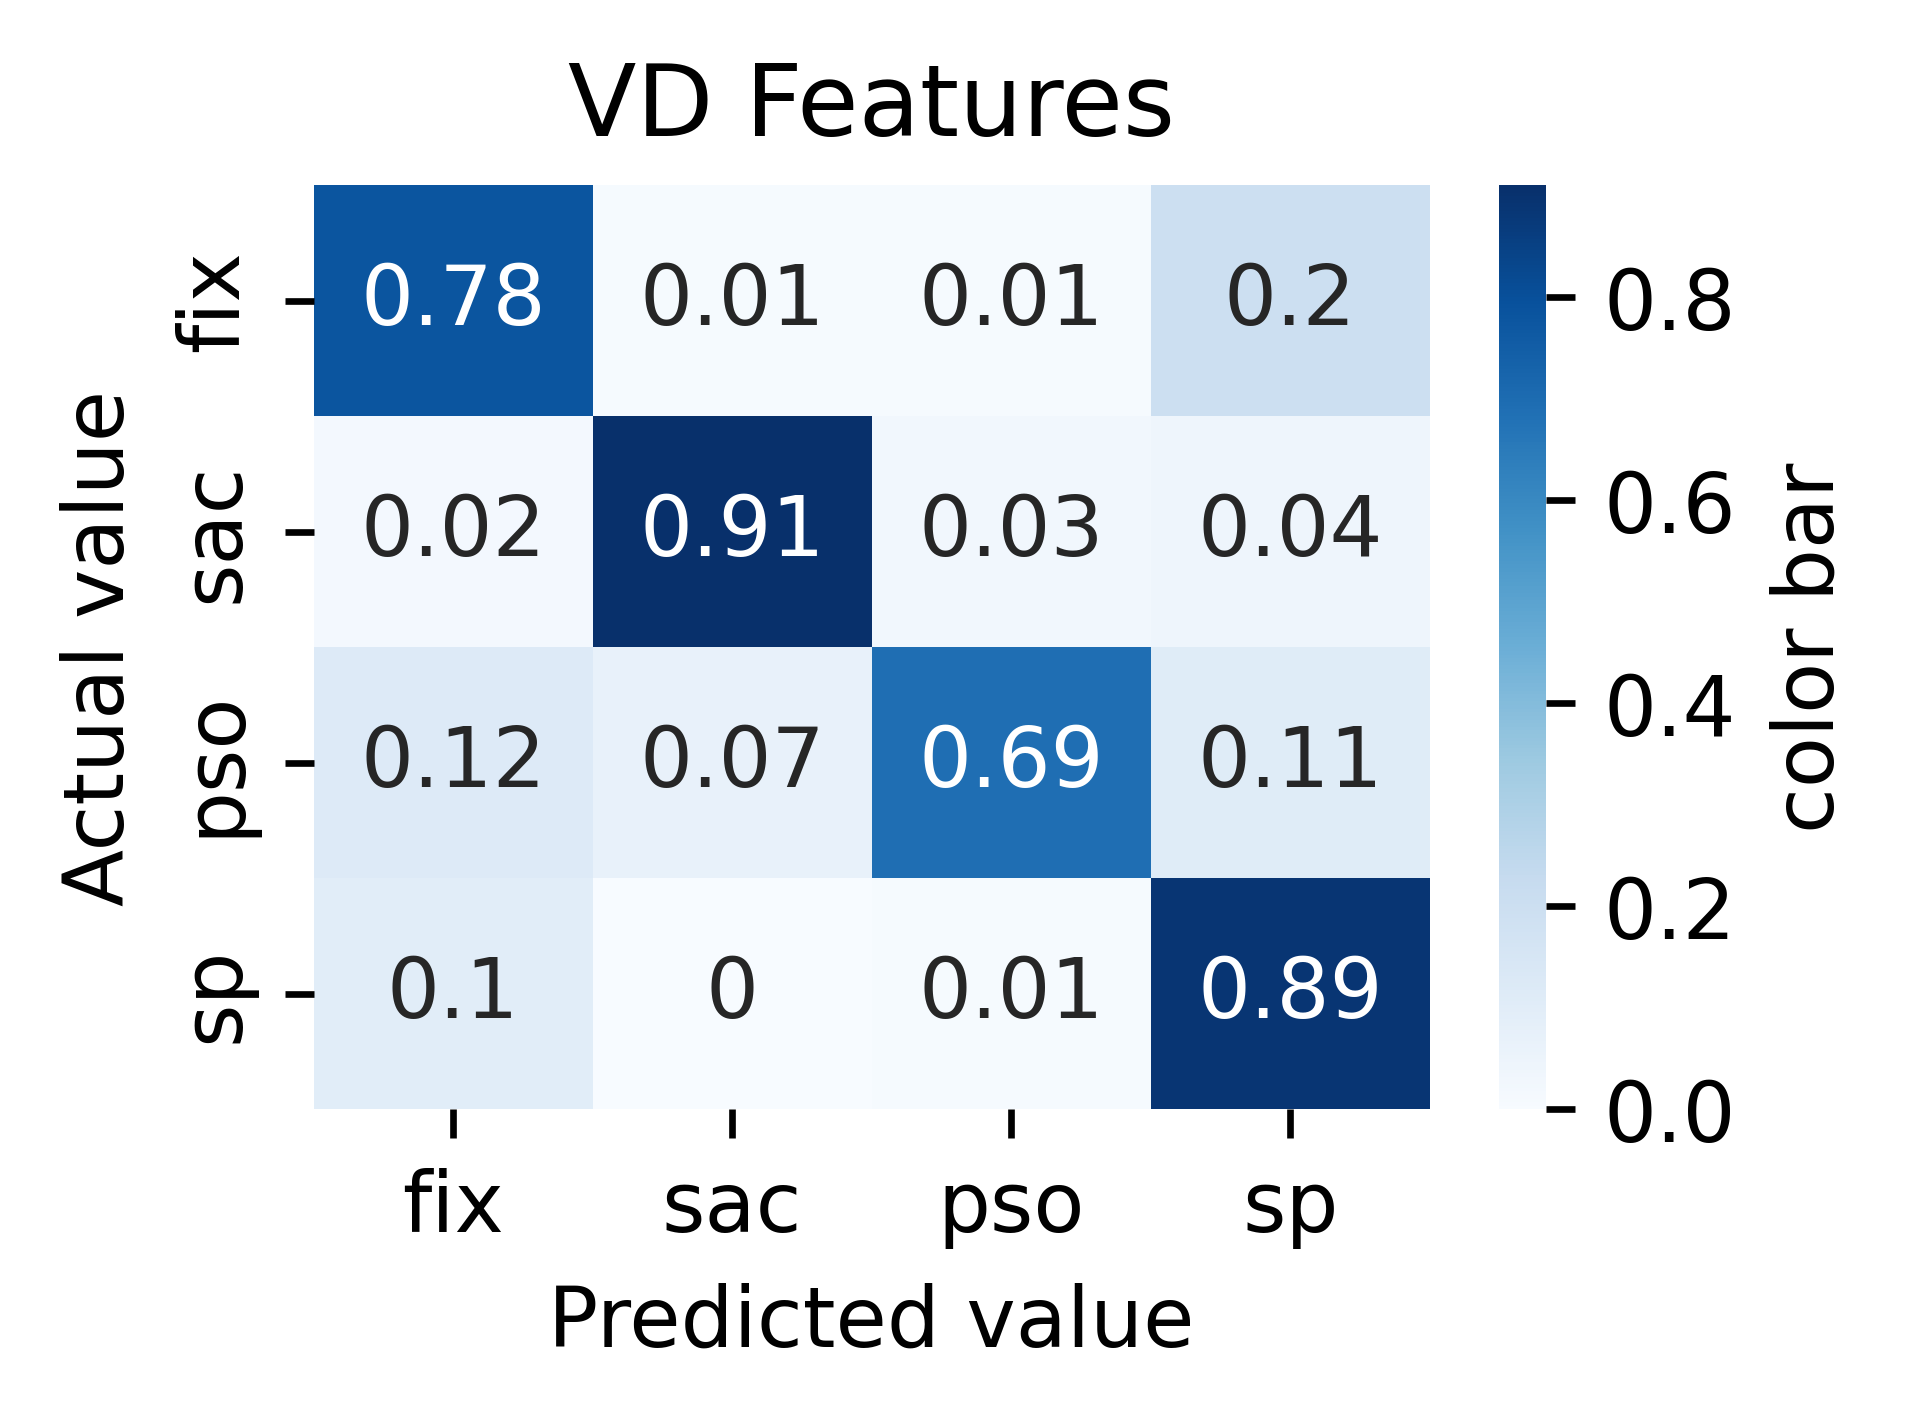

Fixation recall= 78.0
fixation_precision= 76.47058823529412
fixation_f1_score= 77.22772277227723
saccade_recall= 91.0
saccade_precision= 91.91919191919192
saccade_f1_score= 91.4572864321608
PSO recall= 69.6969696969697
PSO precission= 93.24324324324324
PSO_f1_score= 79.76878612716763
SP recall= 89.0
SP precission= 71.7741935483871
SP_f1_score= 79.46428571428572
mean_fixation_duration= 158.24434389140274
mean_saccade_duration= 24.914202279202282
mean_pso_duration= 17.074679487179488
mean_sp_duration= 280.32407286331767
number of fixations_vd= 18.333333333333332
number of saccades_vd= 15.333333333333334
number of pso_vd= 11.0
number of sp_vd= 15.333333333333334


In [ ]:
# @title #Train and Test the model with VD features


A=2

X_vd = []
y_vd = []

for i in range(6):
    X_sequence, y_sequence = make_sequences1(np.array(VD[i]), np.array(yy[i]), sequence_dim)
    X_vd.append(X_sequence)
    y_vd.append(y_sequence)

VD=build_test_model(2, X_vd, y_vd, "VD Features")

# Number and duration of events for VD features
global mean_fix_vd
global mean_sac_vd
global mean_pso_vd
global mean_sp_vd
global num_fix_vd
global num_sac_vd
global num_pso_vd
global num_sp_vd

mean_fix_vd=[]
mean_sac_vd=[]
mean_pso_vd=[]
mean_sp_vd=[]
num_fix_vd=[]
num_sac_vd=[]
num_pso_vd=[]
num_sp_vd=[]
for k in  y_pred_total:
 models_VD=merge_Fix(k)

 mean_fix_vd.append(mean_fix_dur)
 mean_sac_vd.append(mean_sac_dur)
 mean_pso_vd.append(mean_pso_dur)
 mean_sp_vd.append(mean_sp_dur)


 num_fix_vd.append(len(fix))
 num_sac_vd.append(len(sac))
 num_pso_vd.append(len(pso))
 num_sp_vd.append(len(sp))

print('mean_fixation_duration=',2*(mean(mean_fix_vd)))
print('mean_saccade_duration=',2*(mean(mean_sac_vd)))
print('mean_pso_duration=',2*(mean(mean_pso_vd)))
print('mean_sp_duration=',2*(mean(mean_sp_vd)))

print('number of fixations_vd=', mean(num_fix_vd))
print('number of saccades_vd=',mean(num_sac_vd))
print('number of pso_vd=', mean(num_pso_vd))
print('number of sp_vd=', mean(num_sp_vd))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 50, 2, 32)         192       
                                                                 
 batch_normalization_22 (Ba  (None, 50, 2, 32)         128       
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 50, 2, 32)         0         
                                                                 
 conv2d_34 (Conv2D)          (None, 50, 2, 16)         2576      
                                                                 
 batch_normalization_23 (Ba  (None, 50, 2, 16)         64        
 tchNormalization)                                               
                                                                 
 dropout_23 (Dropout)        (None, 50, 2, 16)       

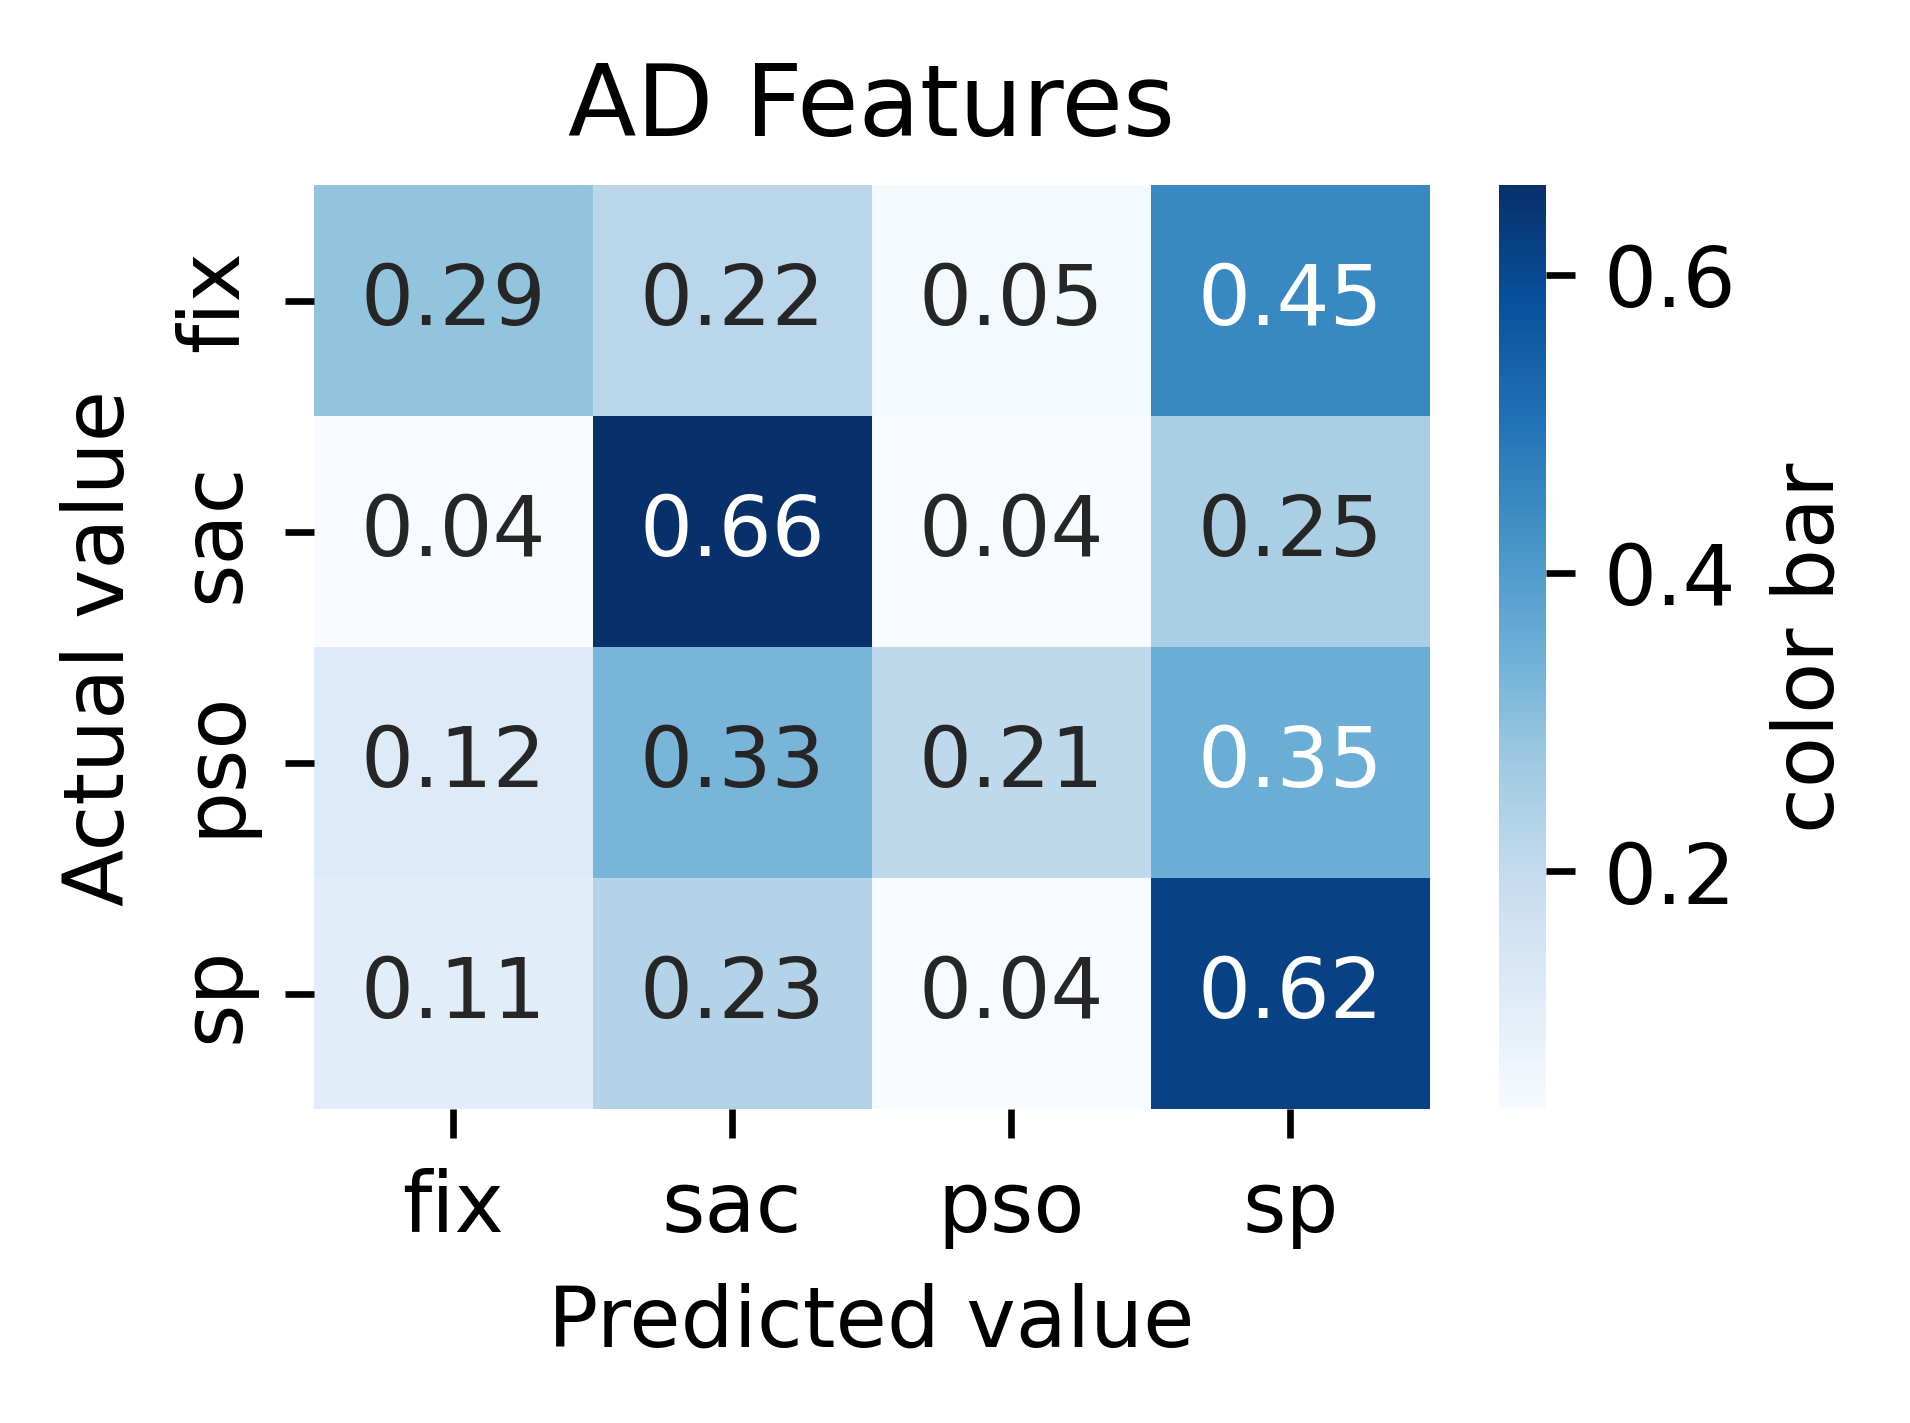

Fixation recall= 28.71287128712871
fixation_precision= 51.785714285714285
fixation_f1_score= 36.94267515923567
saccade_recall= 66.66666666666666
saccade_precision= 45.833333333333336
saccade_f1_score= 54.32098765432098
PSO recall= 20.792079207920793
PSO precission= 61.76470588235295
PSO_f1_score= 31.111111111111118
SP recall= 62.0
SP precission= 37.125748502994014
SP_f1_score= 46.441947565543074
mean_fixation_duration= 23.932668729573482
mean_saccade_duration= 25.50085522921582
mean_pso_duration= 11.793274009940674
mean_sp_duration= 73.0724097432011
number of fixations_ad= 40.0
number of saccades_ad= 47.5
number of pso_ad= 26.166666666666668
number of sp_ad= 71.0


In [ ]:
# @title #Train and Test the model with AD features


A=2

X_ad = []
y_ad = []

for i in range(6):
    X_sequence, y_sequence = make_sequences1(np.array(AD[i]), np.array(yy[i]), sequence_dim)
    X_ad.append(X_sequence)
    y_ad.append(y_sequence)

AD=build_test_model(2, X_ad, y_ad, "AD Features")

# Number and duration of events for AD features
global mean_fix_ad
global mean_sac_ad
global mean_pso_ad
global mean_sp_ad
global num_fix_ad
global num_sac_ad
global num_pso_ad
global num_sp_ad

mean_fix_ad=[]
mean_sac_ad=[]
mean_pso_ad=[]
mean_sp_ad=[]
num_fix_ad=[]
num_sac_ad=[]
num_pso_ad=[]
num_sp_ad=[]
for k in  y_pred_total:
 modelsAVD=merge_Fix(k)

 mean_fix_ad.append(mean_fix_dur)
 mean_sac_ad.append(mean_sac_dur)
 mean_pso_ad.append(mean_pso_dur)
 mean_sp_ad.append(mean_sp_dur)


 num_fix_ad.append(len(fix))
 num_sac_ad.append(len(sac))
 num_pso_ad.append(len(pso))
 num_sp_ad.append(len(sp))

print('mean_fixation_duration=',2*(mean(mean_fix_ad)))
print('mean_saccade_duration=',2*(mean(mean_sac_ad)))
print('mean_pso_duration=',2*(mean(mean_pso_ad)))
print('mean_sp_duration=',2*(mean(mean_sp_ad)))

print('number of fixations_ad=', mean(num_fix_ad))
print('number of saccades_ad=',mean(num_sac_ad))
print('number of pso_ad=', mean(num_pso_ad))
print('number of sp_ad=', mean(num_sp_ad))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 50, 3, 32)         192       
                                                                 
 batch_normalization_12 (Ba  (None, 50, 3, 32)         128       
 tchNormalization)                                               
                                                                 
 dropout_12 (Dropout)        (None, 50, 3, 32)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 3, 16)         2576      
                                                                 
 batch_normalization_13 (Ba  (None, 50, 3, 16)         64        
 tchNormalization)                                               
                                                                 
 dropout_13 (Dropout)        (None, 50, 3, 16)        

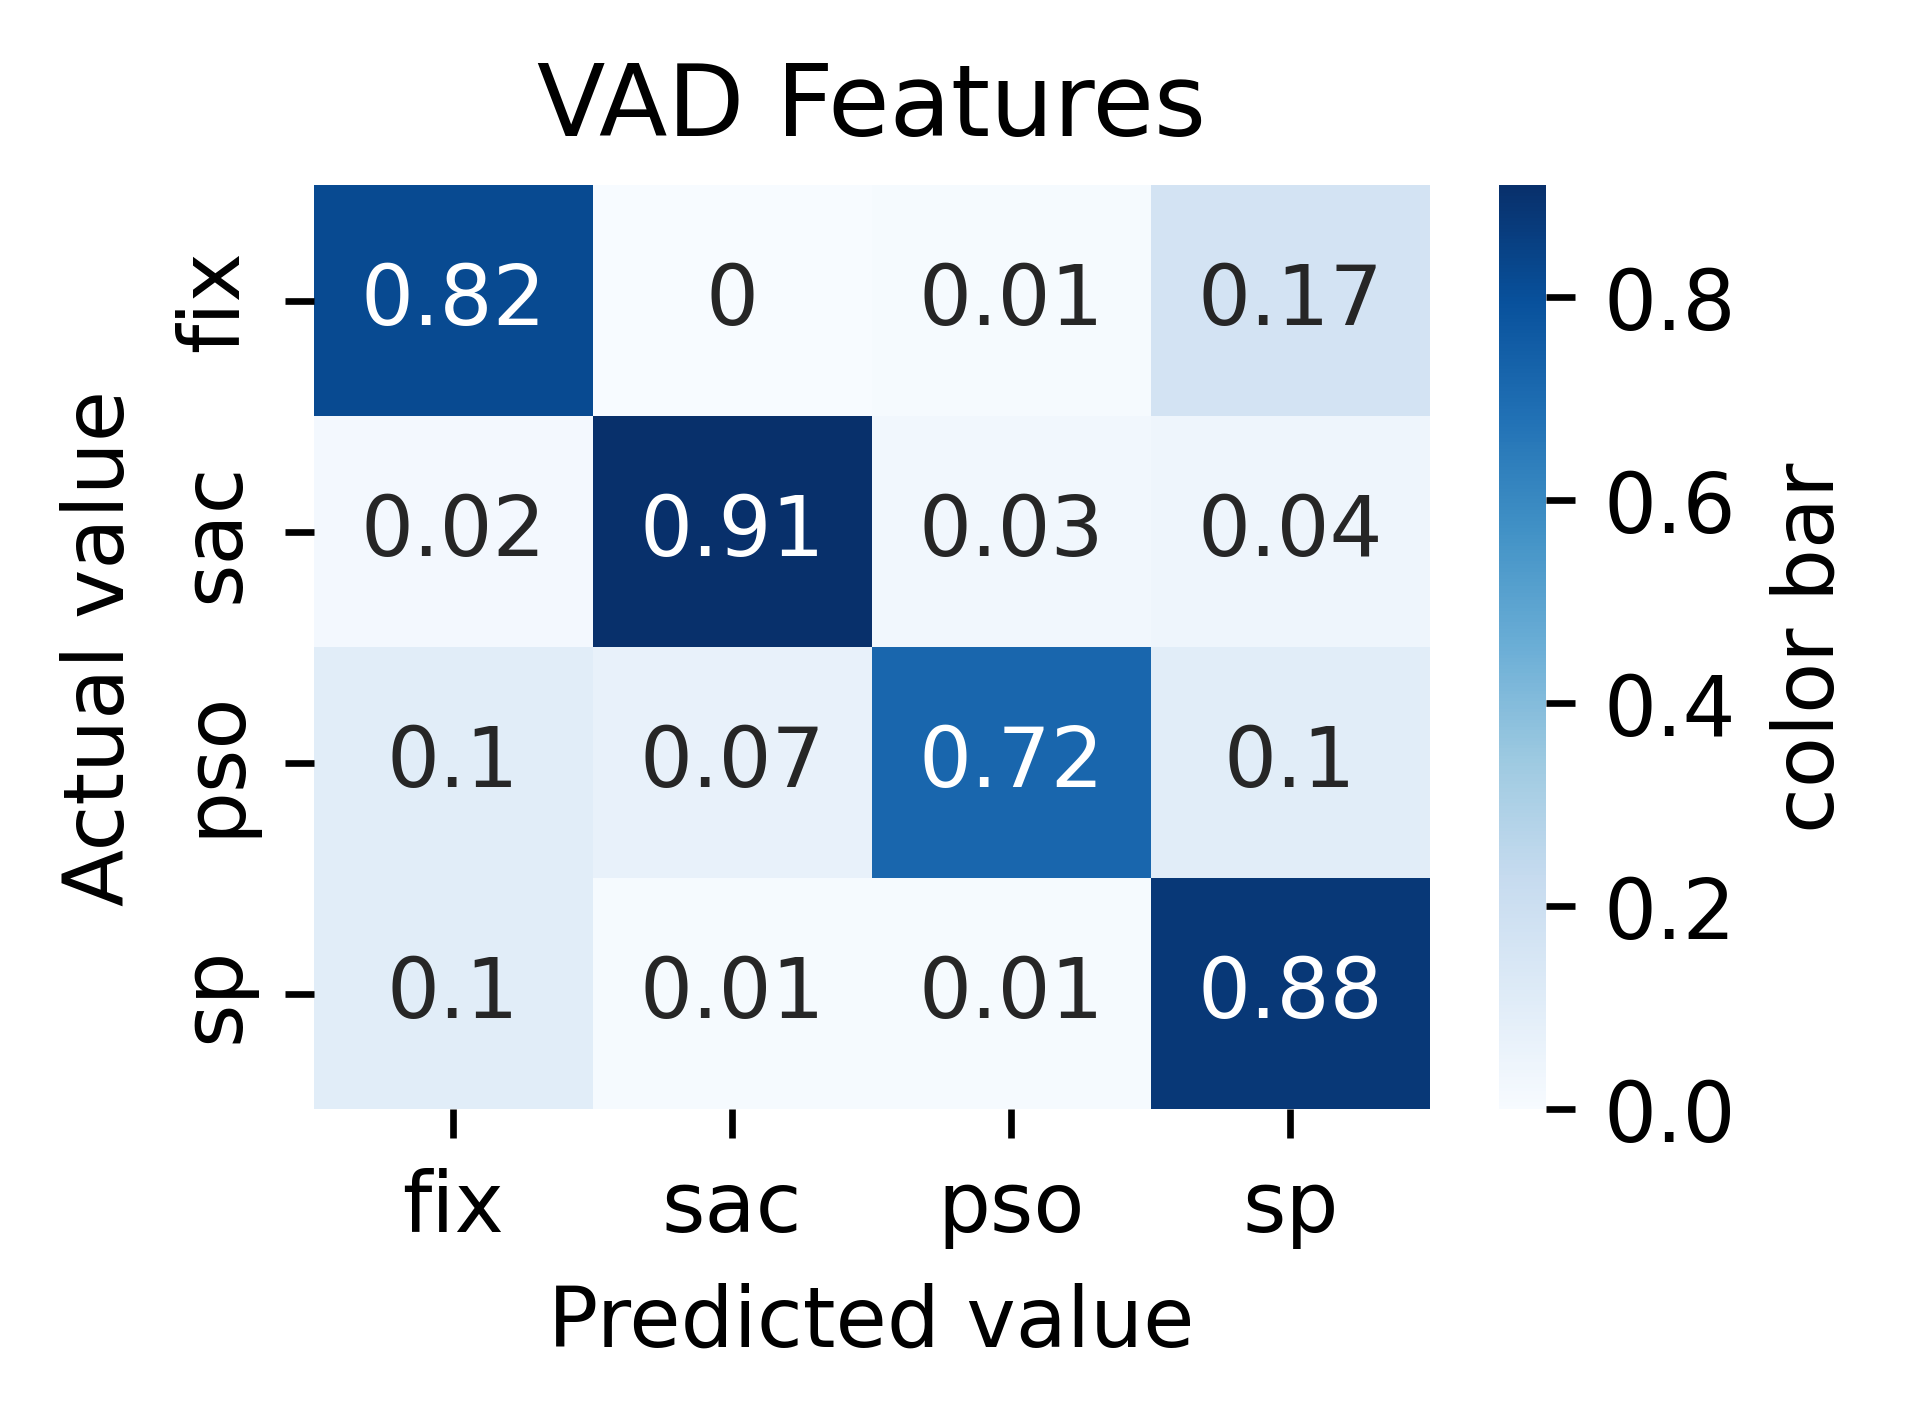

Fixation recall= 82.0
fixation_precision= 78.84615384615384
fixation_f1_score= 80.3921568627451
saccade_recall= 91.0
saccade_precision= 91.91919191919192
saccade_f1_score= 91.4572864321608
PSO recall= 72.72727272727273
PSO precission= 93.5064935064935
PSO_f1_score= 81.81818181818181
SP recall= 88.0
SP precission= 73.94957983193278
SP_f1_score= 80.36529680365297
mean_fixation_duration= 209.16009691232816
mean_saccade_duration= 25.30163817663818
mean_pso_duration= 16.302029914529914
mean_sp_duration= 366.28287037037035
number of fixations_vad= 13.5
number of saccades_vad= 15.166666666666666
number of pso_vad= 11.333333333333334
number of sp_vad= 10.833333333333334


In [ ]:
# @title #Train and Test the model with VAD features

A=3
sequence_dim = 50

X_vad = []
y_vad = []

for i in range(6):
    X_sequence, y_sequence = make_sequences1(np.array(VAD[i]), np.array(yy[i]), sequence_dim)
    X_vad.append(X_sequence)
    y_vad.append(y_sequence)

#Run the models
VAD=build_test_model(3, X_vad, y_vad, "VAD Features")

# Number and duration of events for VD features
global mean_fix_vad
global mean_sac_vad
global mean_pso_vad
global mean_sp_vad
global num_fix_vad
global num_sac_vad
global num_pso_vad
global num_sp_vad

mean_fix_vad=[]
mean_sac_vad=[]
mean_pso_vad=[]
mean_sp_vad=[]
num_fix_vad=[]
num_sac_vad=[]
num_pso_vad=[]
num_sp_vad=[]
for k in  y_pred_total:
 models_VAD=merge_Fix(k)

 mean_fix_vad.append(mean_fix_dur)
 mean_sac_vad.append(mean_sac_dur)
 mean_pso_vad.append(mean_pso_dur)
 mean_sp_vad.append(mean_sp_dur)


 num_fix_vad.append(len(fix))
 num_sac_vad.append(len(sac))
 num_pso_vad.append(len(pso))
 num_sp_vad.append(len(sp))

print('mean_fixation_duration=',2*(mean(mean_fix_vad)))
print('mean_saccade_duration=',2*(mean(mean_sac_vad)))
print('mean_pso_duration=',2*(mean(mean_pso_vad)))
print('mean_sp_duration=',2*(mean(mean_sp_vad)))

print('number of fixations_vad=', mean(num_fix_vad))
print('number of saccades_vad=',mean(num_sac_vad))
print('number of pso_vad=', mean(num_pso_vad))
print('number of sp_vad=', mean(num_sp_vad))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 50, 3, 32)         192       
                                                                 
 batch_normalization_14 (Ba  (None, 50, 3, 32)         128       
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 50, 3, 32)         0         
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 3, 16)         2576      
                                                                 
 batch_normalization_15 (Ba  (None, 50, 3, 16)         64        
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 50, 3, 16)        

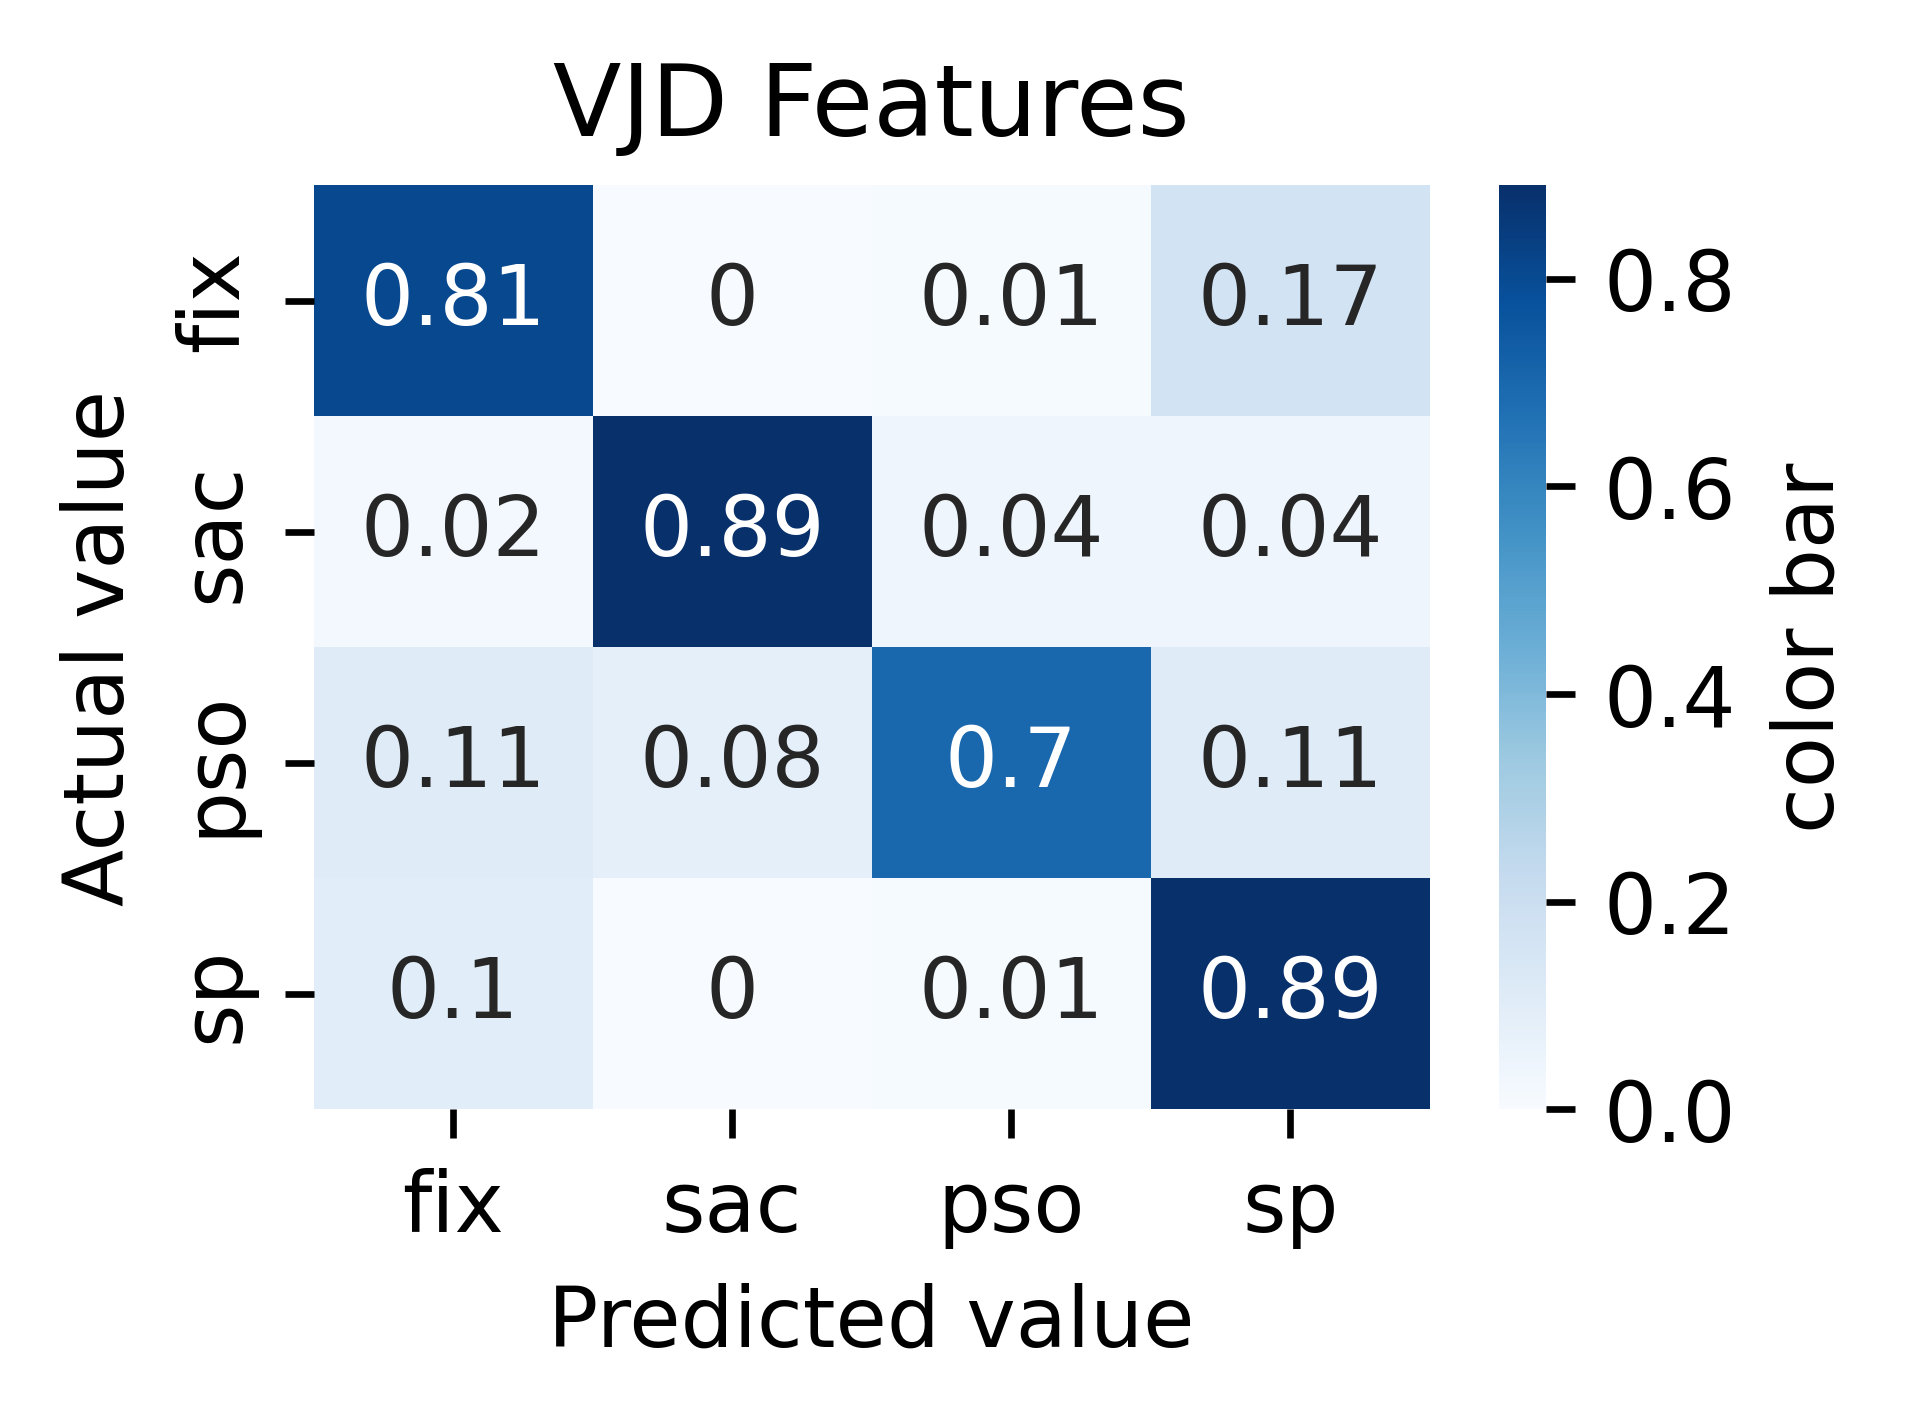

Fixation recall= 81.81818181818181
fixation_precision= 77.88461538461539
fixation_f1_score= 79.80295566502463
saccade_recall= 89.8989898989899
saccade_precision= 91.75257731958763
saccade_f1_score= 90.81632653061224
PSO recall= 70.00000000000001
PSO precission= 92.10526315789474
PSO_f1_score= 79.54545454545456
SP recall= 89.0
SP precission= 73.55371900826447
SP_f1_score= 80.54298642533936
mean_fixation_duration= 203.1311507936508
mean_saccade_duration= 25.056564916564913
mean_pso_duration= 16.837286324786323
mean_sp_duration= 365.28316080055214
number of fixations_vjd= 14.5
number of saccades_vjd= 15.166666666666666
number of pso_vjd= 11.166666666666666
number of sp_vjd= 11.5


In [ ]:
# @title #Train and Test the model with  VJD features



A=3
X_vjd = []
y_vjd = []

for i in range(6):
    X_sequence, y_sequence = make_sequences1(np.array(VJD[i]), np.array(yy[i]), sequence_dim)
    X_vjd.append(X_sequence)
    y_vjd.append(y_sequence)
#The models for VJD
VJD=build_test_model(3, X_vjd, y_vjd, "VJD Features")


#Number and duration of events for VJD features
global mean_fix_vjd
global mean_sac_vjd
global mean_pso_vjd
global mean_sp_vjd
global num_fix_vjd
global num_sac_vjd
global num_pso_vjd
global num_sp_vjd

mean_fix_vjd=[]
mean_sac_vjd=[]
mean_pso_vjd=[]
mean_sp_vjd=[]
num_fix_vjd=[]
num_sac_vjd=[]
num_pso_vjd=[]
num_sp_vjd=[]
for k in  y_pred_total:
 models_VJD=merge_Fix(k)
 mean_fix_vjd.append(mean_fix_dur)
 mean_sac_vjd.append(mean_sac_dur)
 mean_pso_vjd.append(mean_pso_dur)
 mean_sp_vjd.append(mean_sp_dur)


 num_fix_vjd.append(len(fix))
 num_sac_vjd.append(len(sac))
 num_pso_vjd.append(len(pso))
 num_sp_vjd.append(len(sp))

print('mean_fixation_duration=',2*(mean(mean_fix_vjd)))
print('mean_saccade_duration=',2*(mean(mean_sac_vjd)))
print('mean_pso_duration=',2*(mean(mean_pso_vjd)))
print('mean_sp_duration=',2*(mean(mean_sp_vjd)))
print('number of fixations_vjd=', mean(num_fix_vjd))
print('number of saccades_vjd=',mean(num_sac_vjd))
print('number of pso_vjd=', mean(num_pso_vjd))
print('number of sp_vjd=', mean(num_sp_vjd))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 50, 3, 32)         192       
                                                                 
 batch_normalization_18 (Ba  (None, 50, 3, 32)         128       
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 50, 3, 32)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 50, 3, 16)         2576      
                                                                 
 batch_normalization_19 (Ba  (None, 50, 3, 16)         64        
 tchNormalization)                                               
                                                                 
 dropout_19 (Dropout)        (None, 50, 3, 16)        

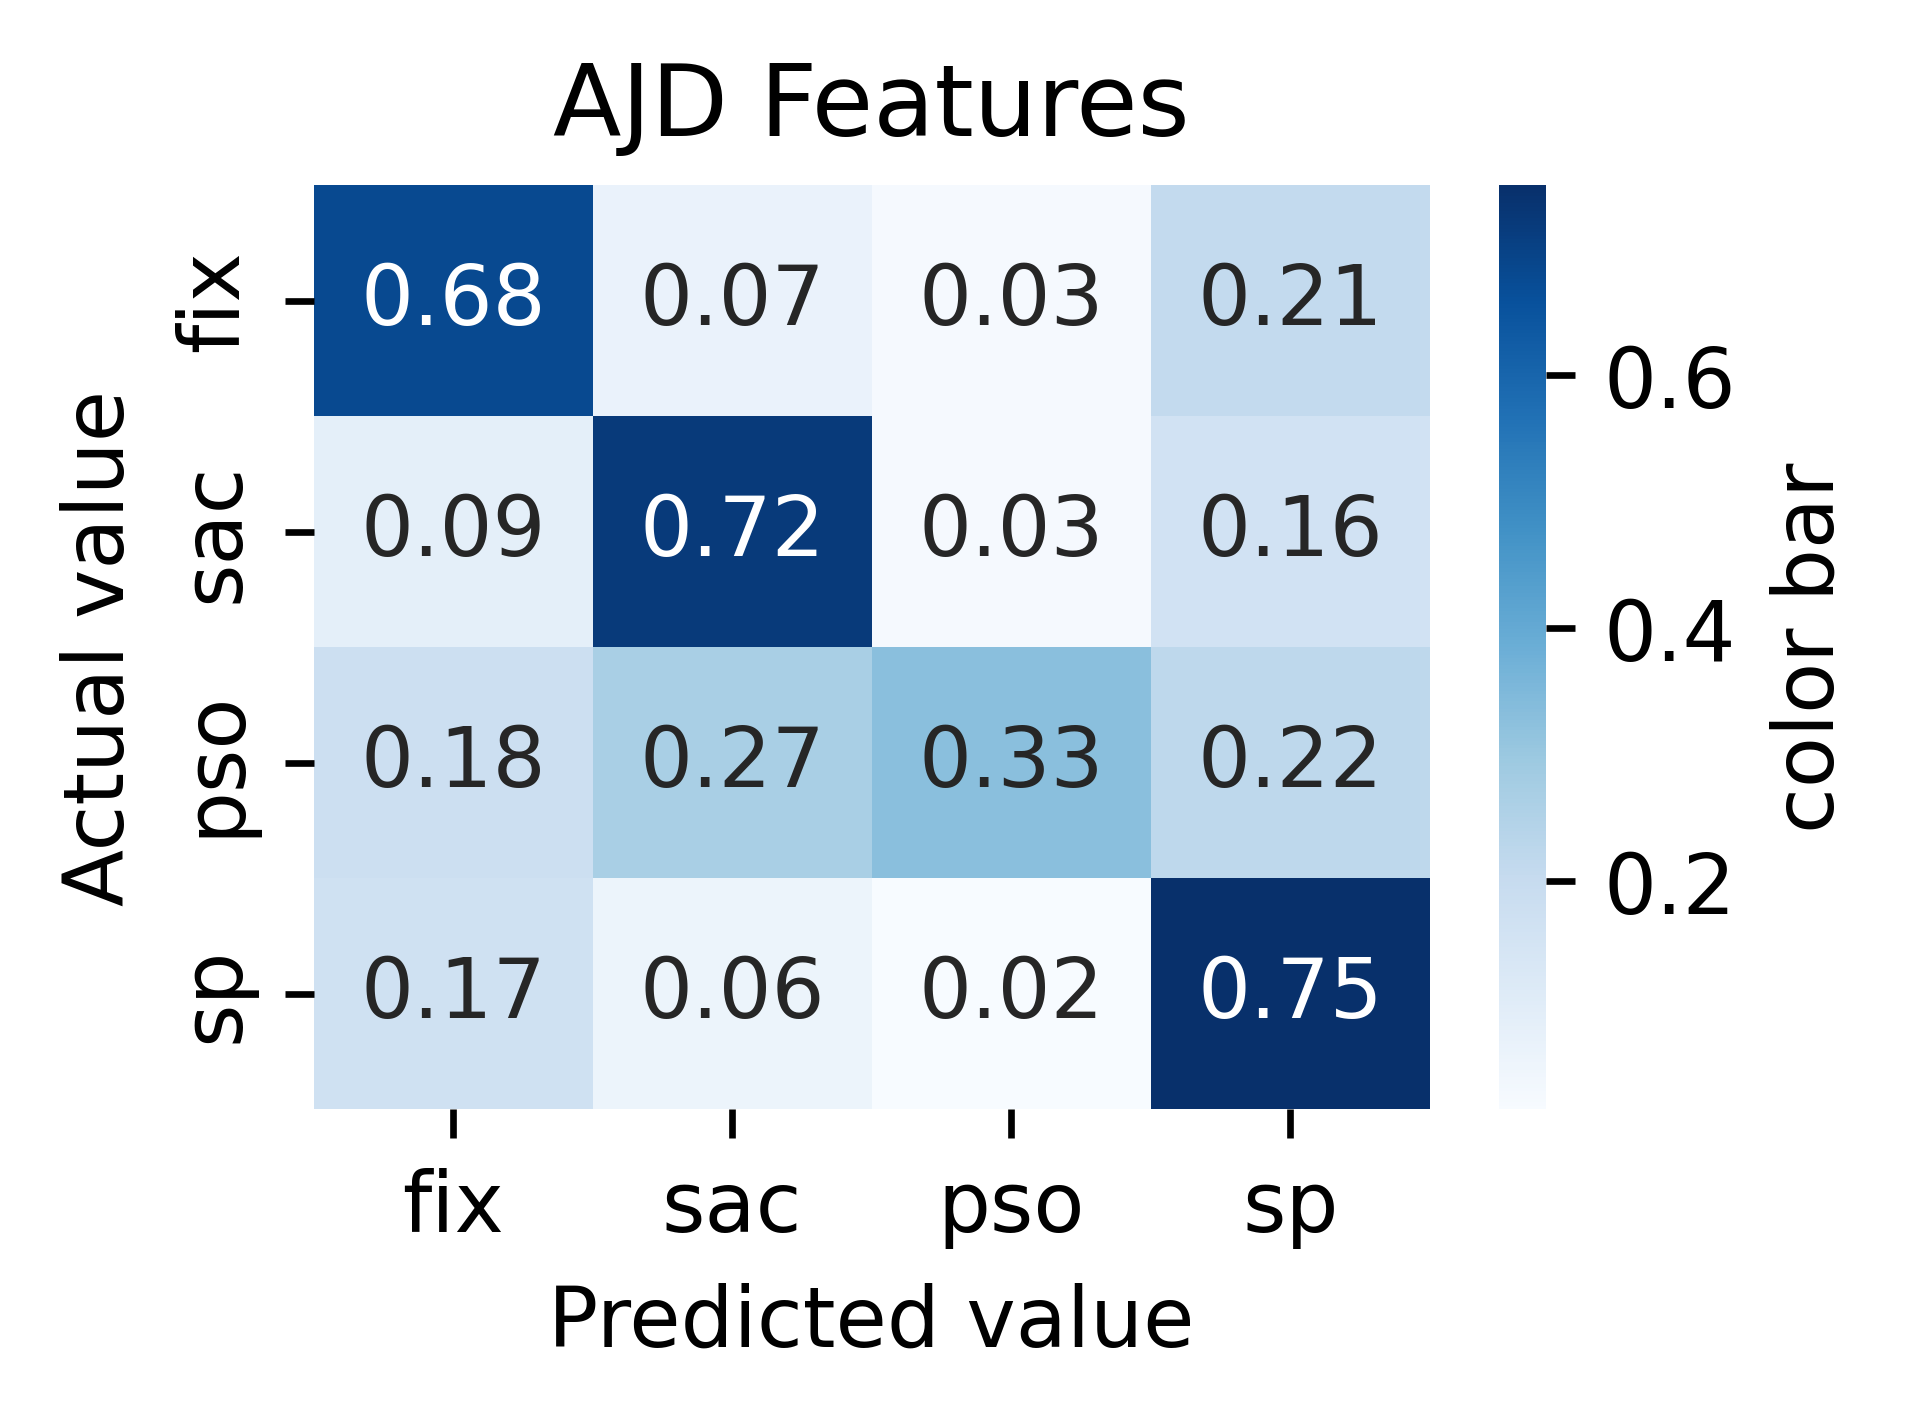

Fixation recall= 68.68686868686869
fixation_precision= 60.71428571428572
fixation_f1_score= 64.45497630331754
saccade_recall= 72.0
saccade_precision= 64.28571428571428
saccade_f1_score= 67.92452830188678
PSO recall= 33.0
PSO precission= 80.48780487804878
PSO_f1_score= 46.808510638297875
SP recall= 75.0
SP precission= 55.97014925373135
SP_f1_score= 64.10256410256412
mean_fixation_duration= 49.30911227202935
mean_saccade_duration= 17.41959852926318
mean_PSO_duration= 11.00798934532068
mean_sp_duration= 60.507859250312805
number of fixations_ajd= 48.0
number of saccades_ajd= 37.166666666666664
number of pso_ajd= 19.666666666666668
number of sp_ajd= 58.5


In [ ]:
# @title #Train and Test the model with AJD featues


A=3
X_ajd = []
y_ajd = []

for i in range(6):
    X_sequence, y_sequence = make_sequences1(np.array(AJD[i]), np.array(yy[i]), sequence_dim)
    X_ajd.append(X_sequence)
    y_ajd.append(y_sequence)


AJD=build_test_model(3, X_ajd, y_ajd, "AJD Features")


#Number and duration of events for VAJD features

global mean_fix_ajd
global mean_sac_ajd
global mean_pso_ajd
global mean_sp_ajd
global num_fix_ajd
global num_sac_ajd
global num_pso_ajd
global num_sp_ajd


mean_fix_ajd=[]
mean_sac_ajd=[]
mean_pso_ajd=[]
mean_sp_ajd=[]
num_fix_ajd=[]
num_sac_ajd=[]
num_pso_ajd=[]
num_sp_ajd=[]
for k in  y_pred_total:
 models_AJD=merge_Fix(k)
 mean_fix_ajd.append(mean_fix_dur)
 mean_sac_ajd.append(mean_sac_dur)
 mean_pso_ajd.append(mean_pso_dur)
 mean_sp_ajd.append(mean_sp_dur)


 num_fix_ajd.append(len(fix))
 num_sac_ajd.append(len(sac))
 num_pso_ajd.append(len(pso))
 num_sp_ajd.append(len(sp))

print('mean_fixation_duration=',2*(mean(mean_fix_ajd)))
print('mean_saccade_duration=',2*(mean(mean_sac_ajd)))
print('mean_PSO_duration=',2*(mean(mean_pso_ajd)))
print('mean_sp_duration=',2*(mean(mean_sp_ajd)))
print('number of fixations_ajd=', mean(num_fix_ajd))
print('number of saccades_ajd=',mean(num_sac_ajd))
print('number of pso_ajd=', mean(num_pso_ajd))
print('number of sp_ajd=', mean(num_sp_ajd))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 50, 4, 32)         192       
                                                                 
 batch_normalization_16 (Ba  (None, 50, 4, 32)         128       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 50, 4, 32)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 50, 4, 16)         2576      
                                                                 
 batch_normalization_17 (Ba  (None, 50, 4, 16)         64        
 tchNormalization)                                               
                                                                 
 dropout_17 (Dropout)        (None, 50, 4, 16)        

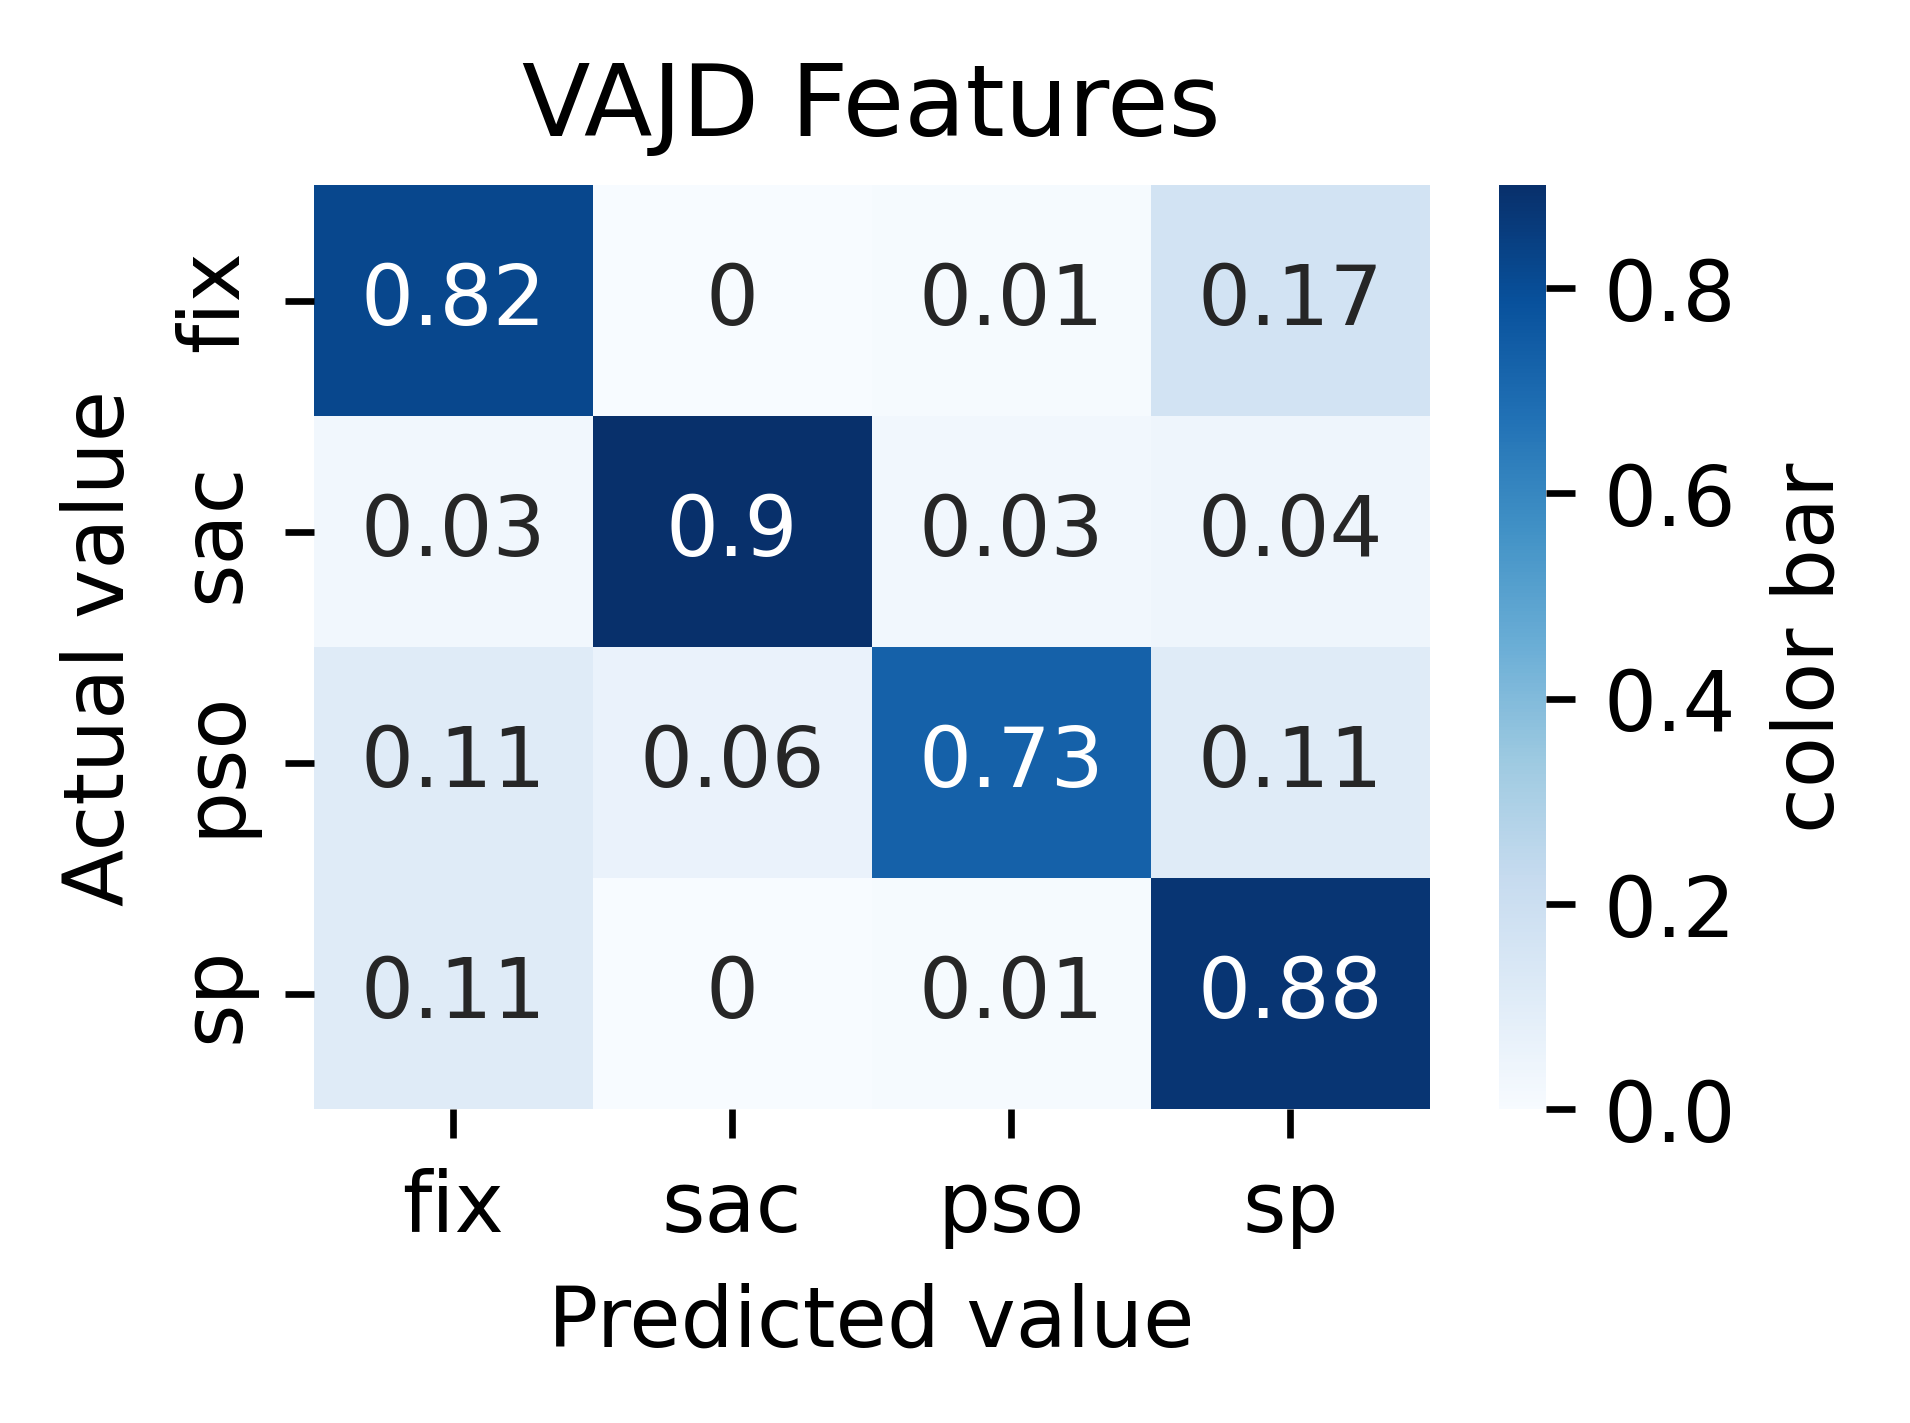

Fixation recall= 82.0
fixation_precision= 76.63551401869158
fixation_f1_score= 79.22705314009661
saccade_recall= 90.0
saccade_precision= 93.75
saccade_f1_score= 91.83673469387755
PSO recall= 72.27722772277228
PSO precission= 93.58974358974359
PSO_f1_score= 81.56424581005587
SP recall= 88.0
SP precission= 73.33333333333334
SP_f1_score= 80.0
mean_fixation_duration= 217.23573833573832
mean_saccade_duration= 25.17667684167684
mean_pso_duration= 16.879807692307693
mean_sp_duration= 403.0829263329263
number of fixations_vajd= 12.5
number of saccades_vajd= 14.666666666666666
number of pso_vajd= 11.333333333333334
number of sp_vajd= 9.833333333333334


In [ ]:
# @title #Train and Test the model with VAJD features


A=4
X_vajd = []
y_vajd = []

for i in range(6):
    X_sequence, y_sequence = make_sequences1(np.array(VAJD[i]), np.array(yy[i]), sequence_dim)
    X_vajd.append(X_sequence)
    y_vajd.append(y_sequence)


VAJD=build_test_model(4, X_vajd, y_vajd, "VAJD Features")


#Number and duration of events for VAJD features
global mean_fix_vajd
global mean_sac_vajd
global mean_pso_vajd
global mean_sp_vajd
global num_fix_vajd
global num_sac_vajd
global num_pso_vajd
global num_sp_vajd

mean_fix_vajd=[]
mean_sac_vajd=[]
mean_pso_vajd=[]
mean_sp_vajd=[]
num_fix_vajd=[]
num_sac_vajd=[]
num_pso_vajd=[]
num_sp_vajd=[]
for k in  y_pred_total:
 models_vajd=merge_Fix(k)
 mean_fix_vajd.append(mean_fix_dur)
 mean_sac_vajd.append(mean_sac_dur)
 mean_pso_vajd.append(mean_pso_dur)
 mean_sp_vajd.append(mean_sp_dur)


 num_fix_vajd.append(len(fix))
 num_sac_vajd.append(len(sac))
 num_pso_vajd.append(len(pso))
 num_sp_vajd.append(len(sp))

print('mean_fixation_duration=',2*(mean(mean_fix_vajd)))
print('mean_saccade_duration=',2*(mean(mean_sac_vajd)))
print('mean_pso_duration=',2*(mean(mean_pso_vajd)))
print('mean_sp_duration=',2*(mean(mean_sp_vajd)))
print('number of fixations_vajd=', mean(num_fix_vajd))
print('number of saccades_vajd=',mean(num_sac_vajd))
print('number of pso_vajd=', mean(num_pso_vajd))
print('number of sp_vajd=', mean(num_sp_vajd))

In [ ]:
#@title Event measuring metrics for manual classification
Y=yy[0],yy[1],yy[2],yy[3],yy[4],yy[5]
from numpy.lib.function_base import median
def merge_Fix(y_pred):
  global fix
  global sac
  global pso
  global sp
  global XX
  global YY

  global mean_fix_dur
  global mean_sac_dur
  global mean_pso_dur
  global mean_sp_dur
  global dur_pso
  global dur_sp
  global dur_sac
  global dur

  fix=[]
  XX=[]
  YY=[]
  X_sac=[]
  Y_sac=[]
  X_pso=[]
  Y_pso=[]
  X_sp=[]
  Y_sp=[]
  dur=[]
  sac=[]
  pso=[]
  sp=[]
  dur_pso=[]
  dur_sp=[]
  dur_sac=[]
  idx = 0
  while idx < (len(y_pred)):
    strt_pos = idx
    val = y_pred[idx]

    while (idx < len(y_pred) and y_pred[idx] == val):

        idx += 1
    end_pos = idx - 1
    if val==1:
      fix.append((1, strt_pos, end_pos))
      dur.append((end_pos+1)-(strt_pos))
      mean_fix_dur=(sum(dur)/len(dur)) #Mean fixation duration for each
    else:
      if val==2:

        sac.append((2, strt_pos, end_pos))
        dur_sac.append((end_pos+1)-(strt_pos))
        mean_sac_dur=(sum(dur_sac)/len(dur_sac))


      else:
        if val==3:

          pso.append((3, strt_pos, end_pos))
          dur_pso.append((end_pos+1)-(strt_pos))
          mean_pso_dur=(sum(dur_pso)/len(dur_pso))


        else:
          if val==4:

             sp.append((4, strt_pos, end_pos))
             dur_sp.append((end_pos+1)-(strt_pos))
             mean_sp_dur=(sum(dur_sp)/len(dur_sp))

global mean_fix
global mean_sac
global mean_pso
global mean_sp
global num_fix
global num_sac
global num_pso
global num_sp

mean_fix=[]
mean_sac=[]
mean_pso=[]
mean_sp=[]
num_fix=[]
num_sac=[]
num_pso=[]
num_sp=[]
for k in  Y:
 models_OR=merge_Fix(k)

 mean_fix.append(mean_fix_dur)
 mean_sac.append(mean_sac_dur)
 mean_pso.append(mean_pso_dur)
 mean_sp.append(mean_sp_dur)


 num_fix.append(len(fix))
 num_sac.append(len(sac))
 num_pso.append(len(pso))
 num_sp.append(len(sp))

print('mean_fixation_duration=',2*(mean(mean_fix)))
print('mean_saccade_duration=',2*(mean(mean_sac)))
print('mean_pso_duration=',2*(mean(mean_pso)))
print('mean_sp_duration=',2*(mean(mean_sp)))

print('number of fixations=', mean(num_fix))
print('number of saccades=',mean(num_sac))
print('number of pso=', mean(num_pso))
print('number of sp=', mean(num_sp))

mean_fixation_duration= 225.62148962148964
mean_saccade_duration= 24.44115384615385
mean_pso_duration= 16.42820512820513
mean_sp_duration= 507.97222222222223
number of fixations= 10.0
number of saccades= 15.5
number of pso= 11.0
number of sp= 6.833333333333333
